# Credit Card Transaction Fraud Detection Case Study


### Summary of Credit Card Transaction Fraud Detection Case Study

The dataset we have taken is related to a credit card transaction fraud detection problem. In this case study, the goal is to detect fraudulent transactions based on various features or variables associated with each transaction. This type of problem typically involves binary classification where the target variable, is_fraud, indicates whether a given transaction is fraudulent (1) or legitimate (0).

Fraud detection in credit card transactions involves analyzing patterns from historical transaction data to predict the likelihood of fraud. Machine learning algorithms, such as Logistic Regression, Random Forests, Support Vector Machines (SVM), or Neural Networks, are commonly used for this purpose. 

Key steps involved in a typical fraud detection pipeline include:

- Data Collection: Gathering transaction data from different sources.
- Data Preprocessing: Handling missing values, scaling numerical features, and encoding categorical variables.
- Feature Engineering: Creating new features that could help in identifying fraud.
- Model Training: Using machine learning models to train on historical transaction data.
- Model Evaluation: Assessing model performance using metrics such as precision, recall, F1-score, and ROC-AUC.


### Brief Description of the Variables

- Unnamed: 0: Appears to be an index or ID for each transaction.
- trans_date_trans_time: The timestamp of the transaction, including the date and time it occurred.
- cc_num: A unique identifier for the credit card used in the transaction. This is sensitive data and should be handled securely.
- merchant: The name or identifier of the merchant where the transaction took place.
- category: The category of the transaction, such as misc_net, grocery_pos, or entertainment. This provides insights into the type of service or product being purchased.
- amt: The amount spent in the transaction, typically denoted in a currency (e.g., usd for US dollars).
- first: The first name of the cardholder.
- last: The last name of the cardholder.
- gender: The gender of the cardholder (e.g., M for male, F for female).
- street: The street address associated with the cardholder.
- city: The city where the cardholder resides.
- state: The state or region where the cardholder resides.
- zip: The zip code of the cardholder's address.
- lat: Latitude of the cardholder's address.
- long: Longitude of the cardholder's address.
- city_pop: The population of the city where the cardholder resides.
- job: The job or occupation of the cardholder.
- dob: The date of birth of the cardholder. This helps in verifying the identity of the cardholder.
- trans_num: A unique identifier for the transaction, which can be used to track or reference a specific transaction.
- unix_time: The transaction time in Unix timestamp format (seconds since January 1, 1970).
- merch_lat: Latitude of the merchant's location where the transaction took place.
- merch_long: Longitude of the merchant's location where the transaction took place.
- is_fraud: The target variable, indicating whether the transaction was fraudulent (1) or legitimate (0).
- Unnamed: This might be an extra or irrelevant column, likely to be dropped during data preprocessing.

In [2]:
# Importing necessary libraries
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Loading of dataset

The dataset is divided into two parts: 
- data1_first_half and 
- data2_second_half. 

These datasets are loaded as data1 and data2, respectively. We then merge data1 and data2 into a single dataset,data which will be used for further analysis.

In [4]:
#Loading data1 file
data1=pd.read_csv(r"C:\Users\lenovo\Projects\credit card fraud detection\Dataset\data1_first_half.csv")

In [6]:
# View first five rows of data1 dataset
data1.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,Unnamed
0,0.0,2019-01-01 00:00:18,2.703186e+15,"fraud_Rippin, Kub and Mann",misc_net,4.97 usd,Jennifer,Banks,F,561 Perry Cove,...,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1.325376e+09,36.011293,-82.048315,0,NaN
1,1.0,2019-01-01 00:00:44,6.304233e+11,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23 usd,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1.325376e+09,49.159047,-118.186462,0,NaN
2,2.0,2019-01-01 00:00:51,3.885949e+13,fraud_Lind-Buckridge,entertainment,220.11 usd,Edward,Sanchez,M,594 White Dale Suite 530,...,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1.325376e+09,43.150704,-112.154481,0,NaN
3,3.0,2019-01-01 00:01:16,3.534094e+15,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.0 usd,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1.325376e+09,47.034331,-112.561071,0,NaN
4,4.0,2019-01-01 00:03:06,3.755342e+14,fraud_Keeling-Crist,misc_pos,41.96 usd,Tyler,Garcia,M,408 Bradley Rest,...,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1.325376e+09,38.674999,-78.632459,0,NaN


In [7]:
# Shape of data1 dataset
data1.shape

(938951, 24)

we have about 938951 rows and 24 columns in data1 dataset.

In [5]:
# Load second half dataset
data2=pd.read_csv(r"C:\Users\lenovo\Projects\credit card fraud detection\Dataset\data1_first_half.csv")

In [6]:
# Check first five rows in data2 dataset
data2.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,Unnamed
0,0.0,2019-01-01 00:00:18,2.703186e+15,"fraud_Rippin, Kub and Mann",misc_net,4.97 usd,Jennifer,Banks,F,561 Perry Cove,...,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1.325376e+09,36.011293,-82.048315,0,NaN
1,1.0,2019-01-01 00:00:44,6.304233e+11,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23 usd,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1.325376e+09,49.159047,-118.186462,0,NaN
2,2.0,2019-01-01 00:00:51,3.885949e+13,fraud_Lind-Buckridge,entertainment,220.11 usd,Edward,Sanchez,M,594 White Dale Suite 530,...,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1.325376e+09,43.150704,-112.154481,0,NaN
3,3.0,2019-01-01 00:01:16,3.534094e+15,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.0 usd,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1.325376e+09,47.034331,-112.561071,0,NaN
4,4.0,2019-01-01 00:03:06,3.755342e+14,fraud_Keeling-Crist,misc_pos,41.96 usd,Tyler,Garcia,M,408 Bradley Rest,...,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1.325376e+09,38.674999,-78.632459,0,NaN


In [11]:
# Shape: rows and columns of dataset2
data2.shape

(938951, 24)

we have about 9398951 rows and 24 columns in data2 dataset.

In [13]:
# Merge datasets data1 and data2 as data using pd.concat
data=pd.concat([data1, data2], axis=0)

In [14]:
#Checking first five rows of the data dataset
data.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,Unnamed
0,0.0,2019-01-01 00:00:18,2.703186e+15,"fraud_Rippin, Kub and Mann",misc_net,4.97 usd,Jennifer,Banks,F,561 Perry Cove,...,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1.325376e+09,36.011293,-82.048315,0,NaN
1,1.0,2019-01-01 00:00:44,6.304233e+11,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23 usd,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1.325376e+09,49.159047,-118.186462,0,NaN
2,2.0,2019-01-01 00:00:51,3.885949e+13,fraud_Lind-Buckridge,entertainment,220.11 usd,Edward,Sanchez,M,594 White Dale Suite 530,...,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1.325376e+09,43.150704,-112.154481,0,NaN
3,3.0,2019-01-01 00:01:16,3.534094e+15,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.0 usd,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1.325376e+09,47.034331,-112.561071,0,NaN
4,4.0,2019-01-01 00:03:06,3.755342e+14,fraud_Keeling-Crist,misc_pos,41.96 usd,Tyler,Garcia,M,408 Bradley Rest,...,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1.325376e+09,38.674999,-78.632459,0,NaN


In [15]:
# Check the shape: numbers of rows and columns in data dataset
data.shape

(1877902, 24)

In [16]:
# concise summary of the DataFrame data.
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1877902 entries, 0 to 938950
Data columns (total 24 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Unnamed: 0             float64
 1   trans_date_trans_time  object 
 2   cc_num                 float64
 3   merchant               object 
 4   category               object 
 5   amt                    object 
 6   first                  object 
 7   last                   object 
 8   gender                 object 
 9   street                 object 
 10  city                   object 
 11  state                  object 
 12  zip                    int64  
 13  lat                    float64
 14  long                   float64
 15  city_pop               int64  
 16  job                    object 
 17  dob                    object 
 18  trans_num              object 
 19  unix_time              float64
 20  merch_lat              float64
 21  merch_long             float64
 22  is_fraud               i

##### Summary of data:

-Total Rows: 1,877,902 entries

-Total Columns: 24




##### Column Summary

-Numeric (float64, int64): 11 columns

-Categorical/Text (object): 13 columns

-Float64 (8 columns): Unnamed: 0, cc_num, lat, long, unix_time, merch_lat, merch_long, Unnamed

-Int64 (3 columns): zip, city_pop, is_fraud

-Text/Categorical Columns (13 columns):trans_date_trans_time, merchant, category, first, last, gender, street, city, state, job, dob, and trans_num.

In [18]:
# Check for missing values in each column
data.isnull().sum()

Unnamed: 0                 25508
trans_date_trans_time          0
cc_num                       734
merchant                       0
category                   14311
amt                        16416
first                          0
last                           0
gender                         0
street                         0
city                           0
state                          0
zip                            0
lat                            0
long                           0
city_pop                       0
job                            0
dob                            0
trans_num                      0
unix_time                   5497
merch_lat                      0
merch_long                     0
is_fraud                       0
Unnamed                  1852394
dtype: int64

#####  Null Values in the Dataset

The dataset contains null values in the following columns:

- **`Unnamed: 0`**: 25,508 missing values
- **`cc_num`**: 734 missing values
- **`category`**: 14,311 missing values
- **`amt`**: 16,416 missing values
- **`unix_time`**: 5,497 missing values

These missing values should be handled appropriately before further analysis, either by imputation, removal, or other cleaning methods.


### Data Cleaning

The columns Unnamed:0, Unnamed, cc_num, street, trans_num, unix_time  are being dropped because they are either irrelevant or doesn’t have a direct impact on predicting fraud.

In [22]:
# Dropping unneccessary columns
data.drop(columns=["Unnamed: 0","Unnamed","cc_num","street","trans_num","unix_time"], inplace=True)

In [23]:
# Check shape of the dataset after dropping of rows
data.shape

(1877902, 18)

##### Checking and Removing of Duplicates rows

In [25]:
# checking number of duplicate rows in the dataset
data.duplicated().sum()

19644

In [26]:
# Dropping duplicate rows from the dataset
data.drop_duplicates(inplace=True)

# Reset the index after removing duplicates
data.reset_index(drop=True, inplace=True)

After dropping duplicates, the index may have gaps, so 'reset_index()' is used to reset the index to a continuous range.

In [28]:
# Check shape of the dataset after dropping of duplicates
data.shape

(1858258, 18)

##### Standardization of Values

Standardizing the amt column to a consistent format (likely USD) by converting values in INR and keeping USD values as they are.

In [30]:
#Standardizing amount 'amt' column in usd
data['amt'] = data['amt'].apply(lambda x: float(x.split()[0])/84 if isinstance(x, str) and x.split()[1]=="inr" else x)
data['amt'] = data['amt'].apply(lambda x: float(x.split()[0]) if isinstance(x, str) and x.split()[1]=="usd" else x)

In [31]:
# Filters the 'data' DataFrame to show only the rows where the 'amt' column contains the string 'inr',
# indicating that the value represents an amount in Indian Rupees (INR) and (USD).
print(data[data['amt'].astype(str).str.contains('inr', case=False, na=False)])
print(data[data['amt'].astype(str).str.contains('usd', case=False, na=False)])

Empty DataFrame
Columns: [trans_date_trans_time, merchant, category, amt, first, last, gender, city, state, zip, lat, long, city_pop, job, dob, merch_lat, merch_long, is_fraud]
Index: []
Empty DataFrame
Columns: [trans_date_trans_time, merchant, category, amt, first, last, gender, city, state, zip, lat, long, city_pop, job, dob, merch_lat, merch_long, is_fraud]
Index: []


##### Handling Missing Values

In [33]:
# Check for missing values in each column
data.isnull().sum()

trans_date_trans_time        0
merchant                     0
category                 14311
amt                      16403
first                        0
last                         0
gender                       0
city                         0
state                        0
zip                          0
lat                          0
long                         0
city_pop                     0
job                          0
dob                          0
merch_lat                    0
merch_long                   0
is_fraud                     0
dtype: int64

In [34]:
# Check for missing values in each column in percentages
data.isnull().sum()/data.shape[0]

trans_date_trans_time    0.000000
merchant                 0.000000
category                 0.007701
amt                      0.008827
first                    0.000000
last                     0.000000
gender                   0.000000
city                     0.000000
state                    0.000000
zip                      0.000000
lat                      0.000000
long                     0.000000
city_pop                 0.000000
job                      0.000000
dob                      0.000000
merch_lat                0.000000
merch_long               0.000000
is_fraud                 0.000000
dtype: float64

##### Summary of Columns with Null Values and Their Percentage

The following columns have missing values in the dataset:

- **`category`**: 0.77% missing values
- **`amt`**: 0.88% missing values

These columns have a relatively small percentage of missing data, and depending on the business requirement, you can handle them through imputation, removal, or other methods.


In [36]:
# Category column missing values
# Count the occurrences of each unique value in the 'category' column of the 'data' DataFrame.
data.category.value_counts()

category
gas_transport     187179
grocery_pos       175609
home              174543
shopping_pos      165695
kids_pets         160988
shopping_net      138694
entertainment     133480
food_dining       130026
personal_care     129483
health_fitness    121918
misc_pos          113734
misc_net           90308
grocery_net        64621
travel             57669
Name: count, dtype: int64

As missing data percentage is low and imputation can help maintain the completeness of the dataset for training your fraud detection model.

So we are imputing:
- category with mode value
- amt with median value

In [38]:
# The 'mode' function returns the value(s) that appear most frequently in the column.
data.category.mode()

0    gas_transport
Name: category, dtype: object

Impute missing values in the 'category' column using the most frequent category given by mode which is 'gas_transport'.

In [40]:
#Fill missing values (NaN) in the 'category' column with the most frequent value (mode).
data['category'].fillna(data['category'].mode()[0], inplace=True)

In [41]:
# statistical summary of the numeric columns in the data DataFrame.
data.describe()

,amt,zip,lat,long,city_pop,merch_lat,merch_long,is_fraud
count,1.841855e+06,1.858258e+06,1.858258e+06,1.858258e+06,1.858258e+06,1.858258e+06,1.858258e+06,1.858258e+06
mean,6.939760e+01,4.881229e+04,3.853945e+01,-9.022754e+01,8.859596e+04,3.853914e+01,-9.022767e+01,5.225324e-03
std,1.589760e+02,2.688239e+04,5.071437e+00,1.374814e+01,3.013769e+05,5.105518e+00,1.375998e+01,7.209731e-02
min,1.190476e-02,1.257000e+03,2.002710e+01,-1.656723e+02,2.300000e+01,1.902742e+01,-1.666716e+02,0.000000e+00
25%,9.350000e+00,2.623700e+04,3.466890e+01,-9.679800e+01,7.410000e+02,3.474057e+01,-9.689943e+01,0.000000e+00
50%,4.676000e+01,4.817400e+04,3.935430e+01,-8.747690e+01,2.443000e+03,3.936926e+01,-8.744075e+01,0.000000e+00
75%,8.261000e+01,7.201100e+04,4.194040e+01,-8.015800e+01,2.032800e+04,4.195626e+01,-8.024418e+01,0.000000e+00
max,2.894890e+04,9.992100e+04,6.669330e+01,-6.795030e+01,2.906700e+06,6.751027e+01,-6.695090e+01,1.000000e+00


In [42]:
# Fill missing values (NaN) in the 'amt' column with the median value.
#Amount column has outliers, so imputing with median.
data['amt'].fillna(data['amt'].median(), inplace=True)

Since the missing values in category and amt are relatively small in number (less than 1% of the total rows), imputation methods like using the mode for category and the median for amt should work well.

In [44]:
#Check for remaining missing values in each column
data.isnull().sum()

trans_date_trans_time    0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

### Data Transformations

In [46]:
import datetime as dt

##### trans_date_trans_time data transformation

Extracting meaningful features 'trans_hour','trans_day','trans_month','trans_year' from 'trans_date_trans_time'.

In [48]:
# Display the first few rows of the 'trans_date_trans_time' column to inspect its contents.
# This helps in understanding the data format
print(data['trans_date_trans_time'].head())

# Convert the 'trans_date_trans_time' column to datetime format using pandas' to_datetime function.
# The 'errors="coerce"' argument ensures that any invalid date format is converted to NaT (Not a Time).
data['trans_date_trans_time'] = pd.to_datetime(data['trans_date_trans_time'], errors='coerce')
                                               
# Count the number of missing values (NaT) in the 'trans_date_trans_time' column after conversion.
print("\nThe number of missing values (NaT) in the 'trans_date_trans_time' column:",data['trans_date_trans_time'].isnull().sum())

0    2019-01-01 00:00:18
1    2019-01-01 00:00:44
2    2019-01-01 00:00:51
3    2019-01-01 00:01:16
4    2019-01-01 00:03:06
Name: trans_date_trans_time, dtype: object

The number of missing values (NaT) in the 'trans_date_trans_time' column: 0


In [49]:
# Extract the hour, day, month, year from the 'trans_date_trans_time' column and create a new column 'trans_hour','trans_day', 'trans_month','trans_year'
data["trans_hour"] = data['trans_date_trans_time'].dt.hour
data["trans_day"] = data['trans_date_trans_time'].dt.day
data["trans_month"] = data['trans_date_trans_time'].dt.month
data["trans_year"] = data['trans_date_trans_time'].dt.year

##### dob column tranformation

Calculating age of the customer 'customer_age'.

In [51]:
# Print the first 10 rows of the 'dob' (date of birth) column to inspect the data 
print(data['dob'].head(10))

# Print the data type of the 'dob' column to check if it is correctly recognized as a date/time object.
print(data['dob'].dtype) 

0    1988-03-09
1    1978-06-21
2    1962-01-19
3    1967-01-12
4    1986-03-28
5    1961-06-19
6    1993-08-16
7    1947-08-21
8    1941-03-07
9    1974-03-28
Name: dob, dtype: object
object


In [52]:
#cleaning a dob (date of birth) column when it contains date values in inconsistent formats
data['dob'] = data['dob'].astype(str).str.split(' ').str[0]

data['dob'] = data['dob'].str.split(' ').str[0]

#Converts the dob column to a pandas datetime format. 
#The errors='coerce' argument ensures that any invalid or improperly formatted date entries are converted to NaT.
data['dob'] = pd.to_datetime(data['dob'], errors='coerce', format='%Y-%m-%d')

In [53]:
# Print the first 5 rows of the 'dob' (date of birth) column to inspect the data 
print(data.dob.head())

# Print the data type of the 'dob' column to check if it is correctly recognized as a date/time object.
print(data['dob'].dtype) 

0   1988-03-09
1   1978-06-21
2   1962-01-19
3   1967-01-12
4   1986-03-28
Name: dob, dtype: datetime64[ns]
datetime64[ns]


In [54]:
# Import the 'datetime' module to work with date and time functions.
from datetime import datetime

# Get the current year using 'datetime.now().year'.
current_year = datetime.now().year

# Create a new column 'customer_age' by subtracting the birth year ('dob') from the current year.
data['customer_age'] = current_year - data['dob'].dt.year

# Print the first few rows of the 'dob' and 'customer_age' columns to verify the calculation.
print(data[['dob', 'customer_age']].head())

         dob  customer_age
0 1988-03-09            36
1 1978-06-21            46
2 1962-01-19            62
3 1967-01-12            57
4 1986-03-28            38


In [55]:
# Filter the rows where the 'dob' (date of birth) column contains missing or invalid values (NaT).
# The 'isna()' function checks for missing values in the 'dob' column.
invalid_dob_rows = data[data['dob'].isna()]
print(invalid_dob_rows)

Empty DataFrame
Columns: [trans_date_trans_time, merchant, category, amt, first, last, gender, city, state, zip, lat, long, city_pop, job, dob, merch_lat, merch_long, is_fraud, trans_hour, trans_day, trans_month, trans_year, customer_age]
Index: []

[0 rows x 23 columns]


In [56]:
# Dropping unneccessary columns
data.drop(columns=["trans_date_trans_time","dob"], inplace=True)

### Data Visualization

In [58]:
#display the first 5 rows of the updated DataFrame.
data.head()

,merchant,category,amt,first,last,gender,city,state,zip,lat,...,city_pop,job,merch_lat,merch_long,is_fraud,trans_hour,trans_day,trans_month,trans_year,customer_age
0,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,Moravian Falls,NC,28654,36.0788,...,3495,"Psychologist, counselling",36.011293,-82.048315,0,0,1,1,2019,36
1,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,Orient,WA,99160,48.8878,...,149,Special educational needs teacher,49.159047,-118.186462,0,0,1,1,2019,46
2,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,Malad City,ID,83252,42.1808,...,4154,Nature conservation officer,43.150704,-112.154481,0,0,1,1,2019,62
3,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,Boulder,MT,59632,46.2306,...,1939,Patent attorney,47.034331,-112.561071,0,0,1,1,2019,57
4,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,Doe Hill,VA,24433,38.4207,...,99,Dance movement psychotherapist,38.674999,-78.632459,0,0,1,1,2019,38


#####  Count of Fraudulent vs. Non-Fraudulent Transactions by Gender
Visualize the distribution of fraudulent and non-fraudulent transactions by gender in order to understand if there is any noticeable pattern or trend related to gender and fraud.

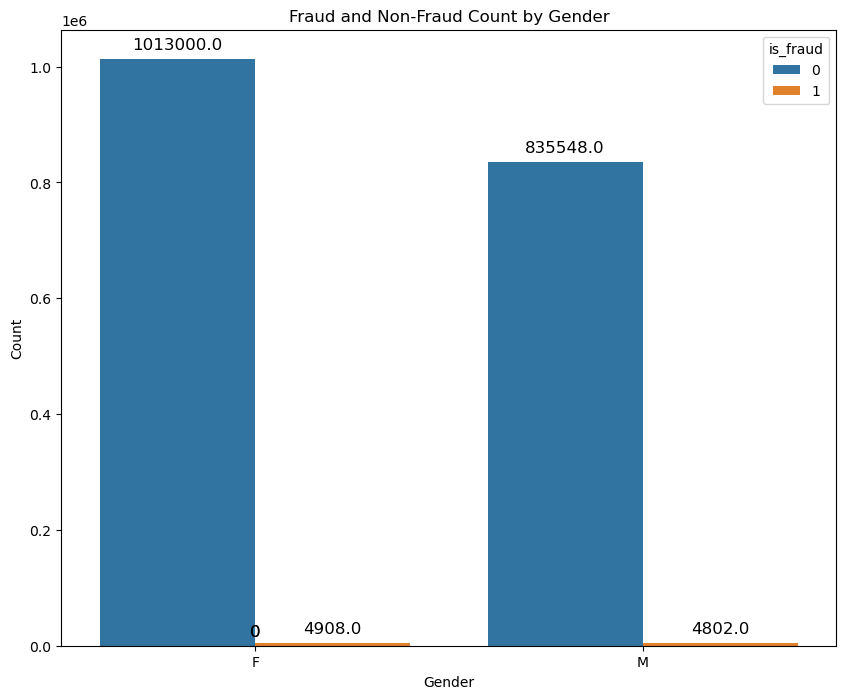

In [60]:
# Plot the count of fraudulent and non-fraudulent transactions by gender.
plt.figure(figsize=(10,8))
ax=sns.countplot(x="gender", hue="is_fraud", data=data)
plt.title("Fraud and Non-Fraud Count by Gender")
plt.xlabel("Gender")
plt.ylabel("Count")
for p in ax.patches:
    # Get the height of each bar (count value)
    height = p.get_height()
    
    # Annotate each bar with the count value on top.
    ax.annotate(f'{height}', 
                (p.get_x() + p.get_width() / 2., height), 
                ha='center', va='center', 
                fontsize=12, color='black', 
                xytext=(0, 10),  # Offset the text slightly above the bar
                textcoords='offset points')
plt.show()

The total transactions done by Female is more compared to Males. But the fraud transactions by both genders 4908 by Female and 4802 by Male are almost similar in numbers.

##### Fradulent Transactions Vs Regions

In [63]:
# Dictionary defining the geographical boundaries (latitude and longitude ranges) for various regions in the US.
region_boundaries = {
    'NewEngland': {'lat_range': (40, 47), 'long_range': (-74, -66)},
    'NY_NJ_PuertoRico_VirginIslands': {'lat_range': (17, 45), 'long_range': (-80, -65)},
    'MidAtlantic': {'lat_range': (36, 42), 'long_range': (-83, -74)},
    'Southeast': {'lat_range': (24, 39), 'long_range': (-91, -75)}, 
    'Midwest': {'lat_range': (36, 49), 'long_range': (-93, -80)},  
    'SouthCentral': {'lat_range': (25, 37), 'long_range': (-106, -89)}, 
    'Plains': {'lat_range': (36, 43), 'long_range': (-102, -89)},
    'Mountain': {'lat_range': (37, 49), 'long_range': (-114, -102)}, 
    'WestCoast_PacificIslands': {'lat_range': (13, 42), 'long_range': (-160, -105)},
    'Northwest_Alaska': {'lat_range': (42, 72), 'long_range': (-150, -110)}
}
# Function to determine the region based on latitude and longitude coordinates.
def get_region_by_lat_long(lat, long):
    # Loop through each region and its boundaries (latitude and longitude ranges).
    for region, bounds in region_boundaries.items():
        lat_min, lat_max = bounds['lat_range']
        long_min, long_max = bounds['long_range']
        # Check if the lat/long values are within the defined range for the region.
        if lat_min <= lat <= lat_max and long_min <= long <= long_max:
            return region
   # Return "Outside US" if the lat/long do not fall within any of the specified regions.
    return "Outside US"

# This creates a new column where each row indicates the region based on the customer's latitude and longitude.
data['cust_loc'] = data.apply(lambda row: get_region_by_lat_long(row['lat'], row['long']), axis=1)

# Apply the same function to determine the region of the merchant based on their latitude and longitude,
# and store the result in a new column 'merch_loc'.
data['merch_loc'] = data.apply(lambda row: get_region_by_lat_long(row['merch_lat'], row['merch_long']), axis=1)

In [64]:
data.head()

,merchant,category,amt,first,last,gender,city,state,zip,lat,...,merch_lat,merch_long,is_fraud,trans_hour,trans_day,trans_month,trans_year,customer_age,cust_loc,merch_loc
0,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,Moravian Falls,NC,28654,36.0788,...,36.011293,-82.048315,0,0,1,1,2019,36,MidAtlantic,MidAtlantic
1,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,Orient,WA,99160,48.8878,...,49.159047,-118.186462,0,0,1,1,2019,46,Northwest_Alaska,Northwest_Alaska
2,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,Malad City,ID,83252,42.1808,...,43.150704,-112.154481,0,0,1,1,2019,62,Mountain,Mountain
3,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,Boulder,MT,59632,46.2306,...,47.034331,-112.561071,0,0,1,1,2019,57,Mountain,Mountain
4,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,Doe Hill,VA,24433,38.4207,...,38.674999,-78.632459,0,0,1,1,2019,38,NY_NJ_PuertoRico_VirginIslands,NY_NJ_PuertoRico_VirginIslands


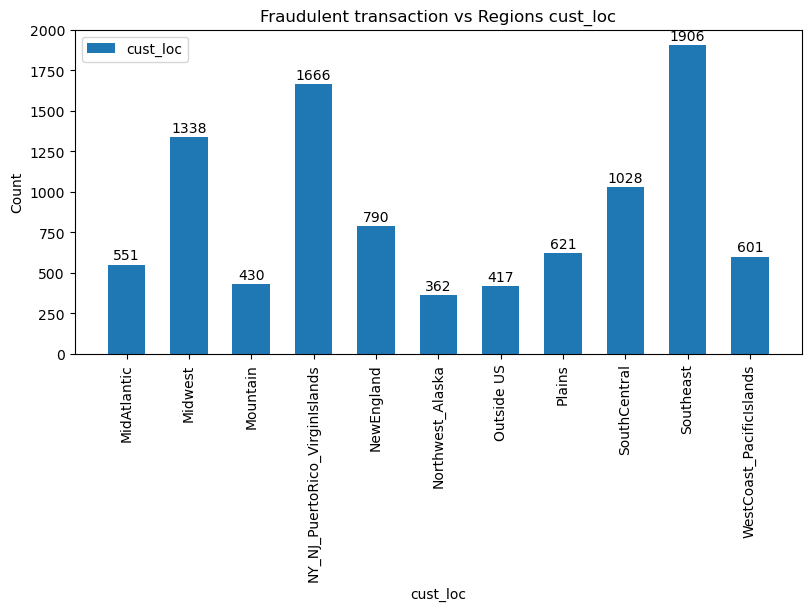

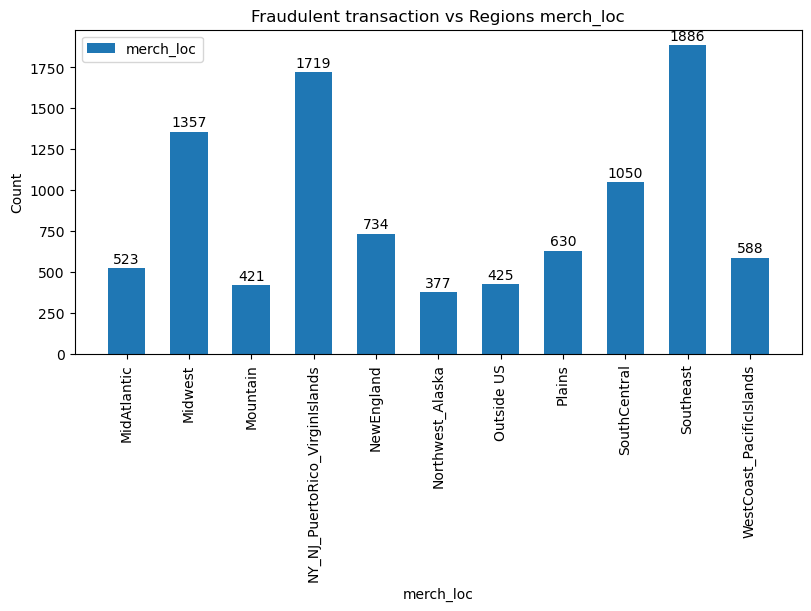

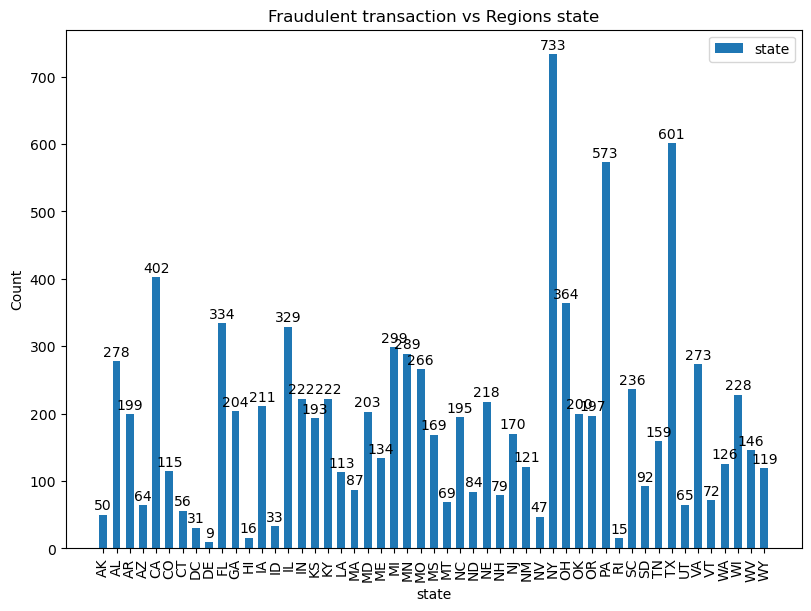

In [65]:
#visualization of how fraud is distributed across different regions or locations in the dataset.
def plot_fraud_counts_by_column(df, column):
    # Filtering the dataset for fraudulent transactions (is_fraud == 1)
    fraud_df = df[df.is_fraud == 1]
    non_df = df[df.is_fraud == 0]
    
    # Counting the number of fraudulent transactions for each category in the specified column
    fraud_count = fraud_df.groupby(column).size()
    
    categories = fraud_count.index
    
    # Setting the positions for each bar in the plot
    x = np.arange(len(categories))
    width = 0.6
    mult = 0
    
    fig, ax = plt.subplots(layout='constrained', figsize = (8, 6))
    # Creating the bars for the plot
    rects = ax.bar(x, fraud_count, width, label = column)
    # Adding labels to each bar with padding for better readability
    ax.bar_label(rects, padding = 1.5)
    
    # Setting the labels for the y-axis and x-axis
    ax.set_ylabel("Count")
    ax.set_xticks(x)
    ax.set_xticklabels(categories, rotation=90)
    ax.set_xlabel(column)
    ax.set_title("Fraudulent transaction vs Regions"+" "+column)
    ax.legend(ncols=2)
    plt.show()

# Looping through the specified columns and calling the function to plot fraud counts for each column
columns = ['cust_loc', 'merch_loc', 'state']
for cols in columns:
    plot_fraud_counts_by_column(data, cols)

##### Fraud Likelihood across Different Transaction Amount Ranges

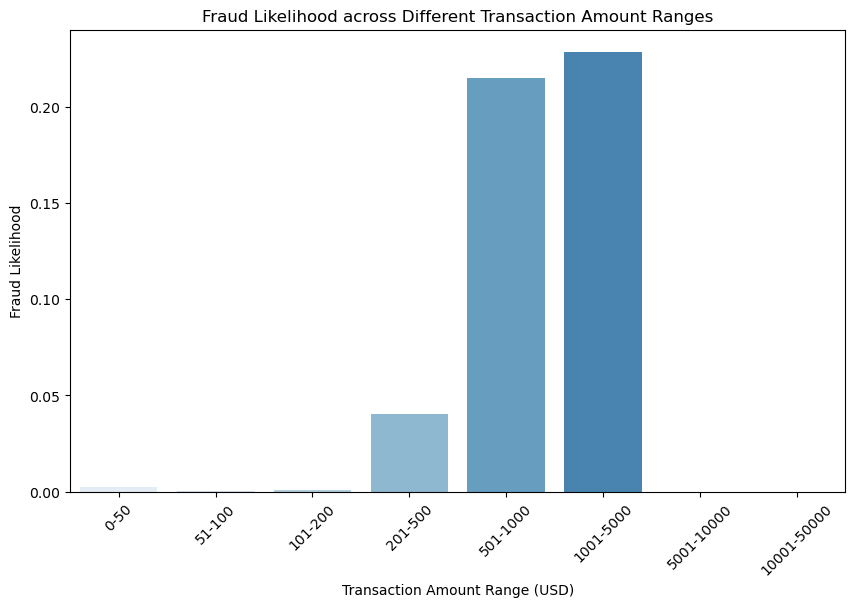

In [67]:
# Step 3: Visualize Fraud Likelihood in Different Amount Ranges

# Create bins for 'amt' (transaction amount) and calculate the fraud rate for each bin
bins = [0, 50, 100, 200, 500, 1000, 5000, 10000, 50000]
labels = ['0-50', '51-100', '101-200', '201-500', '501-1000', '1001-5000', '5001-10000', '10001-50000']
data['amt_range'] = pd.cut(data['amt'], bins=bins, labels=labels, right=False)

# Calculate fraud rate for each amount range
fraud_rate_by_amt = data.groupby('amt_range')['is_fraud'].mean().reset_index()

# Plot Fraud Likelihood across Amount Ranges
plt.figure(figsize=(10, 6))
sns.barplot(x='amt_range', y='is_fraud', data=fraud_rate_by_amt, palette='Blues')

# Setting the labels for the y-axis and x-axis
plt.title('Fraud Likelihood across Different Transaction Amount Ranges')
plt.xlabel('Transaction Amount Range (USD)')
plt.ylabel('Fraud Likelihood')
plt.xticks(rotation=45)
plt.show()

##### Top 10 Cities with a Population-Fraud Ratio

             city  pop_fraud_ratio  is_fraud  city_pop
517     Milwaukee     8.173120e+11       0.0  817312.0
653    Pittsburgh     6.872760e+11       0.0  687276.0
470       Lubbock     2.542820e+11       0.0  254282.0
732    San Angelo     1.039270e+11       0.0  103927.0
46        Ballwin     9.260800e+10       0.0   92608.0
62       Belgrade     1.818200e+10       0.0   18182.0
901   Woods Cross     1.398300e+10       0.0   13983.0
815      Tomahawk     9.594000e+09       0.0    9594.0
352      Hinckley     7.646000e+09       0.0    7646.0
646  Pewee Valley     3.263000e+09       0.0    3263.0


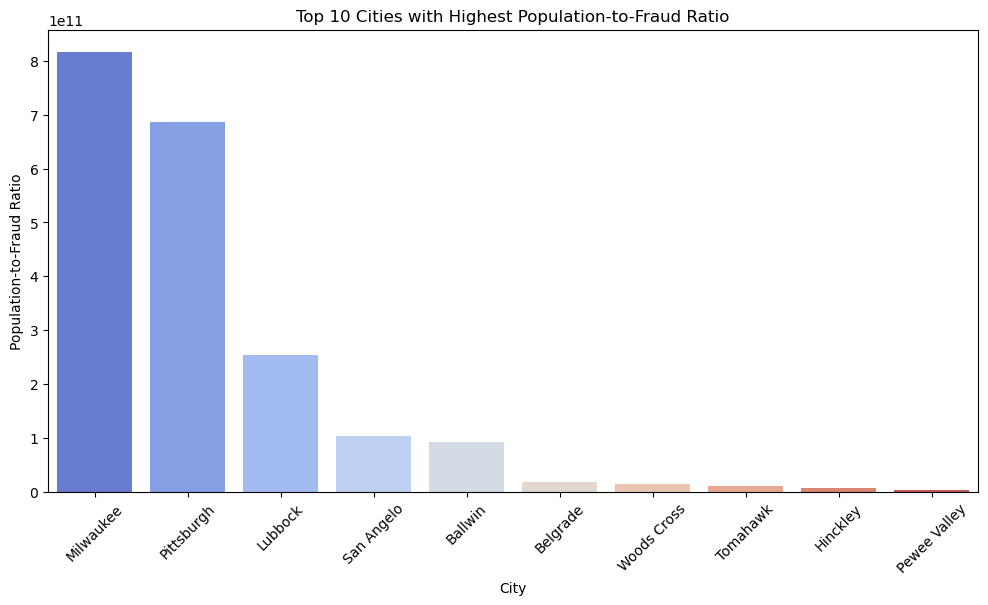

In [69]:
#Identify Top 10 Cities with a Population-Fraud Ratio

#  Calculate fraud rate for each city
city_fraud_rate = data.groupby('city')['is_fraud'].mean().reset_index()

#  Calculate the average population for each city
city_population = data.groupby('city')['city_pop'].mean().reset_index()

#  Merge fraud rate and population data
city_data = pd.merge(city_fraud_rate, city_population, on='city', how='left')

# Calculate the population-to-fraud ratio (population divided by fraud rate)
# Add a small constant (1e-6) to avoid division by zero errors if the fraud rate is zero
city_data['pop_fraud_ratio'] = city_data['city_pop'] / (city_data['is_fraud'] + 1e-6)

#  Sort cities by population-to-fraud ratio in descending order
city_data.sort_values(by='pop_fraud_ratio', ascending=False, inplace=True)

#  Get top 10 cities with the highest population-to-fraud ratio
top_10_cities = city_data.head(10)

# Display the top 10 cities
print(top_10_cities[['city', 'pop_fraud_ratio', 'is_fraud', 'city_pop']])

# Plot top 10 cities by population-to-fraud ratio
plt.figure(figsize=(12, 6))
sns.barplot(x='city', y='pop_fraud_ratio', data=top_10_cities, palette='coolwarm')
plt.title('Top 10 Cities with Highest Population-to-Fraud Ratio')
plt.xlabel('City')
plt.ylabel('Population-to-Fraud Ratio')
plt.xticks(rotation=45)
plt.show()


If Ratio is high means less the fraud.

Top 5 cities with high population to fraud ratio:
- Pewee Valley
- Hinckley
- Tomahawk
- Woods Cross
- Belgrade

##### Fraud Likelihood in Different Categories

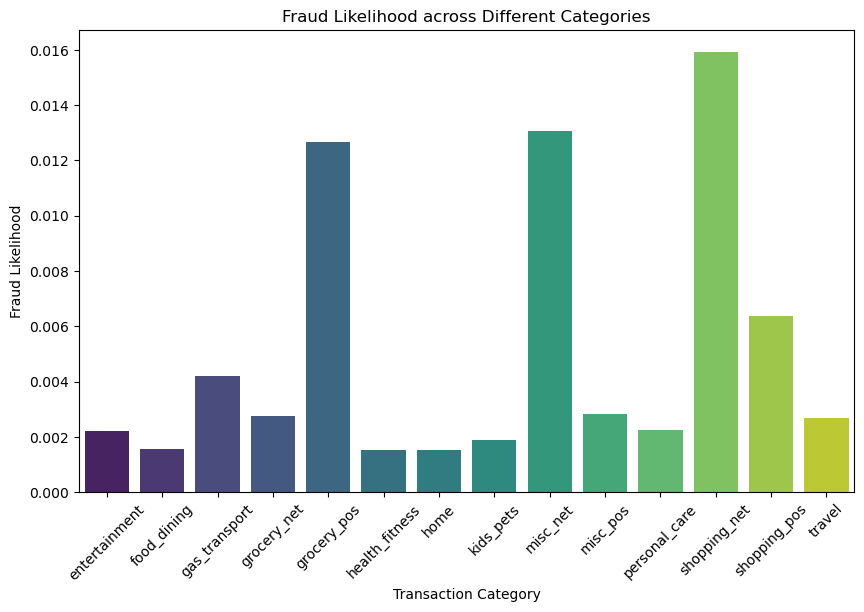

In [71]:
# Fraud Likelihood in Different Categories

# Calculate fraud rate by category
fraud_rate_by_category = data.groupby('category')['is_fraud'].mean().reset_index()

# Plot fraud likelihood by category
plt.figure(figsize=(10, 6))
sns.barplot(x='category', y='is_fraud', data=fraud_rate_by_category, palette='viridis')

# Setting the labels for the y-axis and x-axis
plt.title('Fraud Likelihood across Different Categories')
plt.xlabel('Transaction Category')
plt.ylabel('Fraud Likelihood')
plt.xticks(rotation=45)
plt.show()

Top 3 categories with high fradualent transactions:
- Shopping_net
- misc_net
- grocery_pos

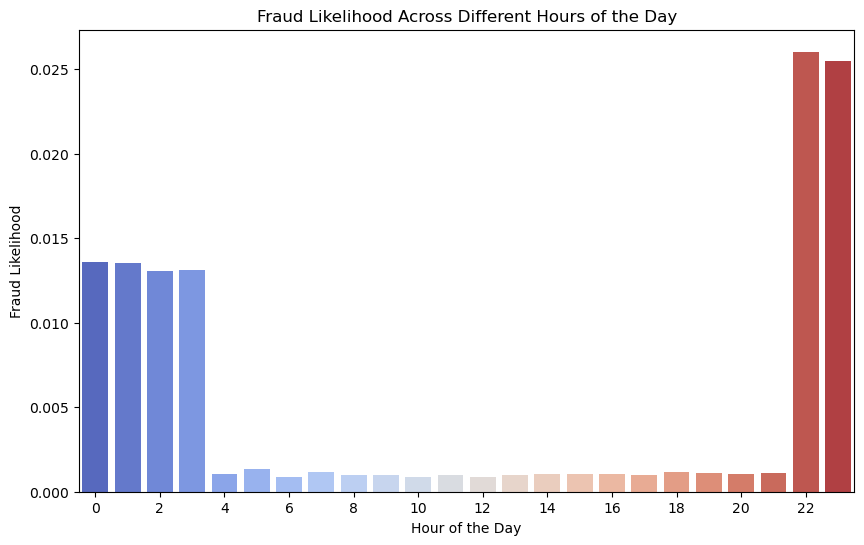

In [72]:
# Fraud Likelihood by Hour of the Day

# Calculate fraud rate by hour of the day
fraud_rate_by_hour = data.groupby('trans_hour')['is_fraud'].mean().reset_index()

# Plot fraud likelihood by hour of the day
plt.figure(figsize=(10, 6))
sns.barplot(x='trans_hour', y='is_fraud', data=fraud_rate_by_hour, palette='coolwarm')

# Setting the labels for the y-axis and x-axis
plt.title('Fraud Likelihood Across Different Hours of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Fraud Likelihood')
plt.xticks(range(0, 24, 2))  # Show every 2nd hour for clarity
plt.show()

### Outlier Handling

In [74]:
data.describe()

,amt,zip,lat,long,city_pop,merch_lat,merch_long,is_fraud,trans_hour,trans_day,trans_month,trans_year,customer_age
count,1.858258e+06,1.858258e+06,1.858258e+06,1.858258e+06,1.858258e+06,1.858258e+06,1.858258e+06,1.858258e+06,1.858258e+06,1.858258e+06,1.858258e+06,1.858258e+06,1.858258e+06
mean,6.919778e+01,4.881229e+04,3.853945e+01,-9.022754e+01,8.859596e+04,3.853914e+01,-9.022767e+01,5.225324e-03,1.280293e+01,1.587103e+01,7.150601e+00,2.019499e+03,5.071331e+01
std,1.582870e+02,2.688239e+04,5.071437e+00,1.374814e+01,3.013769e+05,5.105518e+00,1.375998e+01,7.209731e-02,6.821074e+00,8.882373e+00,3.420552e+00,4.999994e-01,1.739033e+01
min,1.190476e-02,1.257000e+03,2.002710e+01,-1.656723e+02,2.300000e+01,1.902742e+01,-1.666716e+02,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,2.019000e+03,1.900000e+01
25%,9.440000e+00,2.623700e+04,3.466890e+01,-9.679800e+01,7.410000e+02,3.474057e+01,-9.689943e+01,0.000000e+00,7.000000e+00,8.000000e+00,4.000000e+00,2.019000e+03,3.700000e+01
50%,4.676000e+01,4.817400e+04,3.935430e+01,-8.747690e+01,2.443000e+03,3.936926e+01,-8.744075e+01,0.000000e+00,1.400000e+01,1.600000e+01,7.000000e+00,2.019000e+03,4.900000e+01
75%,8.218000e+01,7.201100e+04,4.194040e+01,-8.015800e+01,2.032800e+04,4.195626e+01,-8.024418e+01,0.000000e+00,1.900000e+01,2.400000e+01,1.000000e+01,2.020000e+03,6.200000e+01
max,2.894890e+04,9.992100e+04,6.669330e+01,-6.795030e+01,2.906700e+06,6.751027e+01,-6.695090e+01,1.000000e+00,2.300000e+01,3.100000e+01,1.200000e+01,2.020000e+03,1.000000e+02


amt                Axes(0.125,0.712609;0.168478x0.167391)
zip             Axes(0.327174,0.712609;0.168478x0.167391)
lat             Axes(0.529348,0.712609;0.168478x0.167391)
long            Axes(0.731522,0.712609;0.168478x0.167391)
city_pop           Axes(0.125,0.511739;0.168478x0.167391)
merch_lat       Axes(0.327174,0.511739;0.168478x0.167391)
merch_long      Axes(0.529348,0.511739;0.168478x0.167391)
is_fraud        Axes(0.731522,0.511739;0.168478x0.167391)
trans_hour          Axes(0.125,0.31087;0.168478x0.167391)
trans_day        Axes(0.327174,0.31087;0.168478x0.167391)
trans_month      Axes(0.529348,0.31087;0.168478x0.167391)
trans_year       Axes(0.731522,0.31087;0.168478x0.167391)
customer_age           Axes(0.125,0.11;0.168478x0.167391)
dtype: object

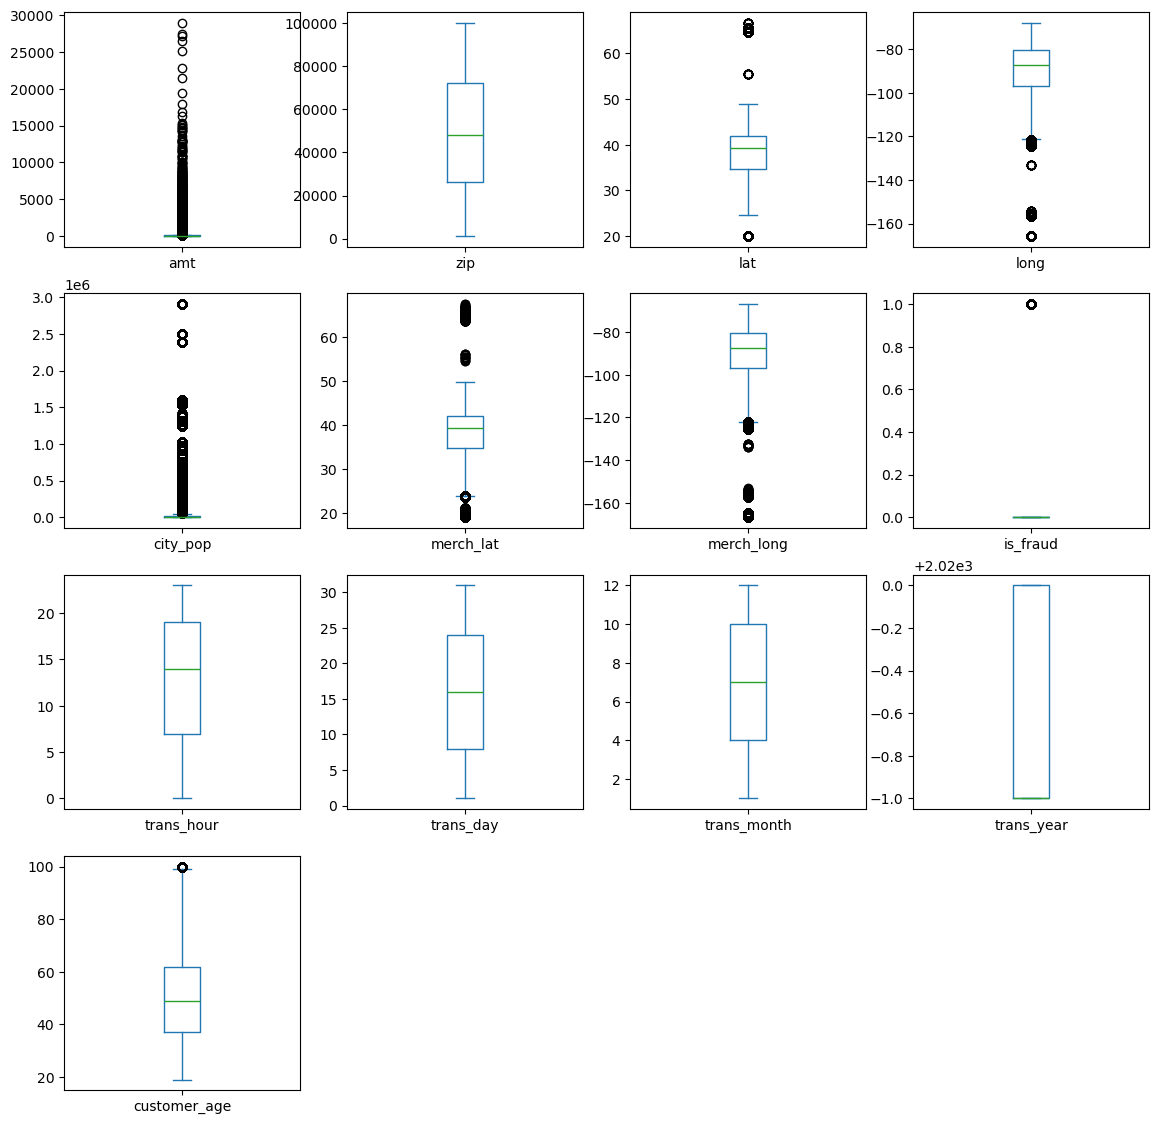

In [75]:
#Outliners Identification

#using box plot
data.plot(kind='box', figsize=(14,14), layout=(4,4), sharex=False, subplots=True)

We have found outliers in the following columns: amt, city_pop, customer_age, lat, long, merch_lat, merch_long.


In [77]:
data.shape

(1858258, 24)

In [78]:
import pandas as pd

def count_outliers(df, column, lower_percentile=1, upper_percentile=99):
    # Calculate the lower and upper percentile values
    lower_cap = df[column].quantile(lower_percentile / 100)
    upper_cap = df[column].quantile(upper_percentile / 100)
    
    # Count the number of outliers (values below lower cap or above upper cap)
    lower_outliers = df[(df[column] < lower_cap)]
    upper_outliers = df[(df[column] > upper_cap)]
    
    # Return the count of outliers
    return lower_outliers.shape[0], upper_outliers.shape[0]


# Count outliers in the 'customer_age' column
outlier_low_count, outlier_high_count = count_outliers(data, 'customer_age', lower_percentile=1, upper_percentile=99)
print("Age: Number of outliers below the 1th percentile and above 99th percentile:", outlier_low_count,outlier_high_count,outlier_low_count/1858258,outlier_high_count/1858258)

outlier_low_count, outlier_high_count = count_outliers(data, 'amt', lower_percentile=1, upper_percentile=99)
print("Amount: Number of outliers below the 1th percentile and above 99th percentile:", outlier_low_count,outlier_high_count,outlier_low_count/1858258,outlier_high_count/1858258)

outlier_low_count, outlier_high_count = count_outliers(data, 'city_pop', lower_percentile=1, upper_percentile=99)
print("City Population: Number of outliers below the 1th percentile and above 99th percentile:", outlier_low_count,outlier_high_count,outlier_low_count/1858258,outlier_high_count/1858258)

Age: Number of outliers below the 1th percentile and above 99th percentile: 13929 16182 0.007495729871740092 0.00870815570281414
Amount: Number of outliers below the 1th percentile and above 99th percentile: 18583 18582 0.01000022601813096 0.009999687879723914
City Population: Number of outliers below the 1th percentile and above 99th percentile: 16150 16878 0.008690935273788678 0.009082700034117975


This operation is about identifying and counting outliers in the customer_age, amt, and city_pop columns, based on values that fall below the 1st percentile or above the 99th percentile.

The output includes the total count of outliers and their proportion to the total dataset, helping assess the presence of outliers in the columns.

- Age - 0.87% of upper outliers
- Amt - 1% of lower outliers and 0.99% of upper outliers
- city_pop - 0.86% of lower outliers and 0.9% of upper outliers

##### Oulier Handling for Age

This function is designed to cap the values of the column to specified upper and lower percentiles, effectively removing extreme values (outliers) by limiting them to these thresholds.

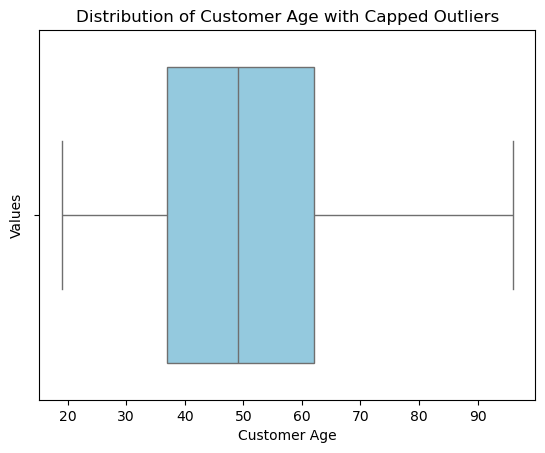

In [81]:
#outlier treatment for cutomer age
import pandas as pd

def cap_outliers(df, column, lower_percentile=1, upper_percentile=99):
    # Calculate the lower and upper percentile values
    lower_cap = df[column].quantile(lower_percentile / 100)
    upper_cap = df[column].quantile(upper_percentile / 100)
    
    # Cap the outliers
    df[column] = df[column].clip(upper=upper_cap)

    return df

data= pd.DataFrame(data)
# Cap outliers in the 'value' column
df_capped = cap_outliers(data, 'customer_age', upper_percentile=99)

#outlier treatment for amt
sns.boxplot(x=data['customer_age'], color='skyblue')
plt.title('Distribution of Customer Age with Capped Outliers')
plt.xlabel('Customer Age')
plt.ylabel('Values')
plt.show()

##### Outlier Handling for City_Pop

In [83]:
# Compute group-based medians using both 'state' and 'city'
group_medians = data[data['city_pop'] >= 0].groupby(['state', 'city'])['city_pop'].median()

# Replace negative values with the group-based median based on 'state' and 'city'
data['city_pop'] = data.apply(
    lambda row: group_medians.get((row['state'], row['city']), row['city_pop']) if row['city_pop'] < 0 else row['city_pop'],
    axis=1
)


Since population can never be negative, We used the median population of city by state to impute negative values to improve accuracy.

Group by city and state to compute the median population for each combination of city and state.

Replace negative values with the corresponding median value for the specific city and state.

In [85]:
# Replace zero values with NaN to avoid log(0) errors
data['city_pop_log'] = np.log(data['city_pop'].replace(0, np.nan))

count    1.858258e+06
mean     8.356834e+00
std      2.452303e+00
min      3.135494e+00
25%      6.608001e+00
50%      7.800982e+00
75%      9.919755e+00
max      1.488253e+01
Name: city_pop_log, dtype: float64


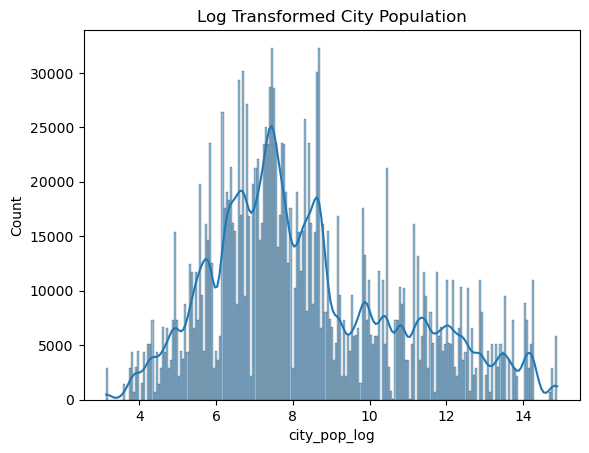

In [86]:
# Summary statistics of the transformed column
print(data['city_pop_log'].describe())

# Visualize the log-transformed data
sns.histplot(data['city_pop_log'], kde=True)
plt.title('Log Transformed City Population')
plt.show()


 Log transformation is common in data analysis and machine learning when dealing with skewed or wide-ranging numerical data outliers.
This treatment makes the distribution more normal, reduce the impact of outliers, ensure the data is more suitable for modeling.

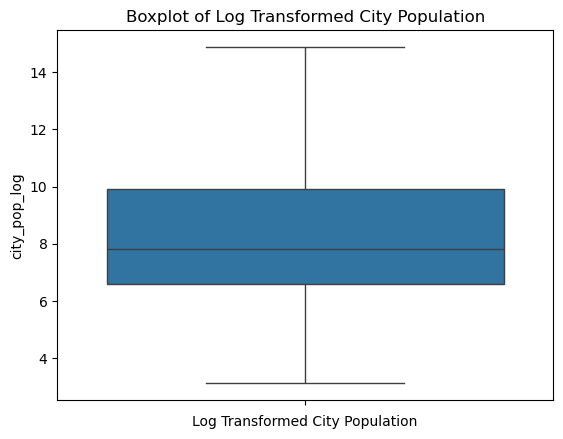

In [88]:
# Create a boxplot of the log-transformed city population
sns.boxplot(data['city_pop_log'])
plt.title('Boxplot of Log Transformed City Population')
plt.xlabel('Log Transformed City Population')
plt.show()

In [89]:
data.drop('city_pop',axis=1,inplace=True)

In [90]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1858258 entries, 0 to 1858257
Data columns (total 24 columns):
 #   Column        Dtype   
---  ------        -----   
 0   merchant      object  
 1   category      object  
 2   amt           float64 
 3   first         object  
 4   last          object  
 5   gender        object  
 6   city          object  
 7   state         object  
 8   zip           int64   
 9   lat           float64 
 10  long          float64 
 11  job           object  
 12  merch_lat     float64 
 13  merch_long    float64 
 14  is_fraud      int64   
 15  trans_hour    int32   
 16  trans_day     int32   
 17  trans_month   int32   
 18  trans_year    int32   
 19  customer_age  int32   
 20  cust_loc      object  
 21  merch_loc     object  
 22  amt_range     category
 23  city_pop_log  float64 
dtypes: category(1), float64(6), int32(5), int64(2), object(10)
memory usage: 292.4+ MB


##### Outlier handling of Amt column

In [92]:
# Check percentiles of 'amt' column
percentiles = data['amt'].quantile([0.01, 0.25, 0.50, 0.75, 0.99])
print("Percentiles of Amount Column:")
print(percentiles)

Percentiles of Amount Column:
0.01      1.050612
0.25      9.440000
0.50     46.760000
0.75     82.180000
0.99    533.630000
Name: amt, dtype: float64


In [93]:
# Calculate the 99th percentile of 'amt'
percentile_99 = data['amt'].quantile(0.99)

# Filter rows where 'amt' is above the 99th percentile
outliers_above_99 = data[data['amt'] > percentile_99]

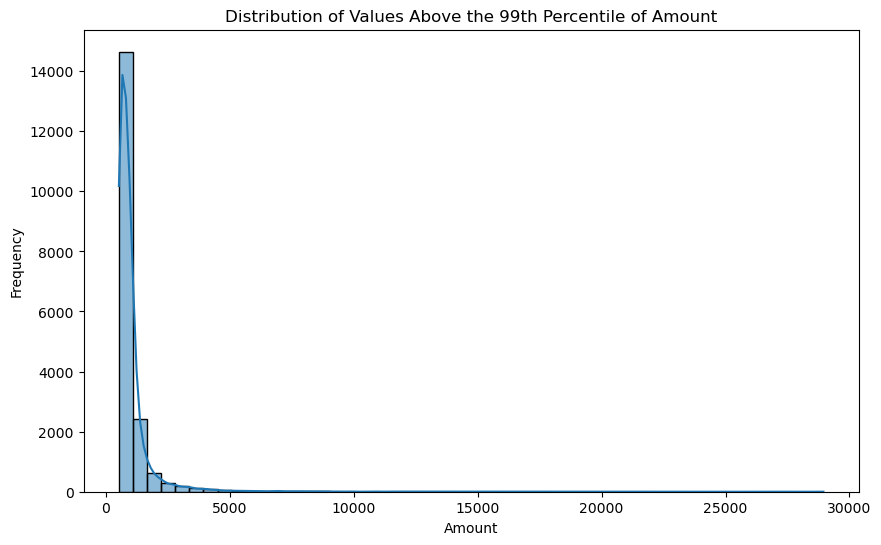

In [94]:
# Calculate the 99th percentile of 'amt'
percentile_99 = data['amt'].quantile(0.99)

# Filter rows where 'amt' is above the 99th percentile
outliers_above_99 = data[data['amt'] > percentile_99]

# Plot histogram to check distribution of outliers
plt.figure(figsize=(10,6))
sns.histplot(outliers_above_99['amt'], bins=50, kde=True)
plt.title('Distribution of Values Above the 99th Percentile of Amount')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.show()

**Power transformations** such as Box-Cox (for positive data) or Yeo-Johnson (for both positive and negative data) can be used to make the data more normally distributed, especially when there are exponential outliers. when applied can stabilize variance and make the data more Gaussian (normal distribution).

These transformations apply a power function to the data that reduces skewness and outliers.

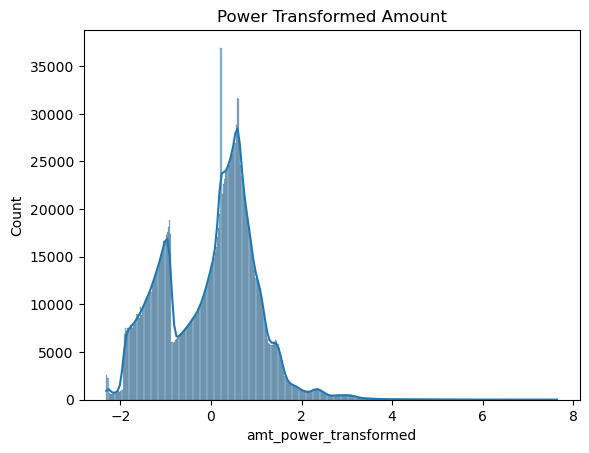

In [96]:
from sklearn.preprocessing import PowerTransformer

# Apply Power Transformer
scaler = PowerTransformer()
data['amt_power_transformed'] = scaler.fit_transform(data[['amt']])

# Visualize the power-transformed data
sns.histplot(data['amt_power_transformed'], kde=True)
plt.title("Power Transformed Amount")
plt.show()


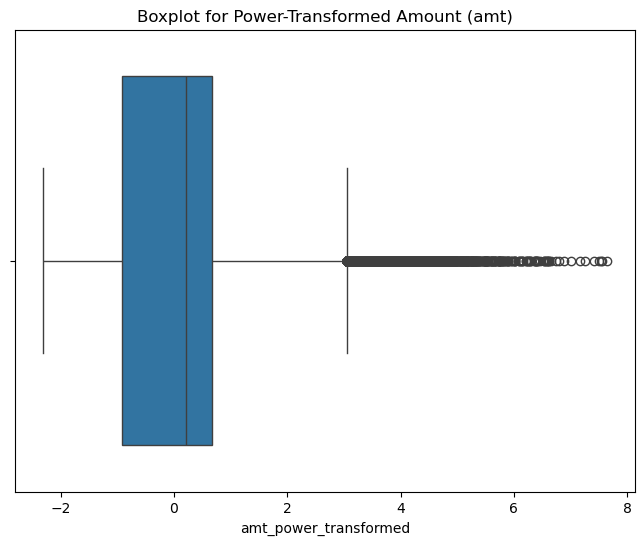

In [97]:
# Plot the boxplot for the transformed 'amt' data
plt.figure(figsize=(8, 6))
sns.boxplot(x=data['amt_power_transformed'])
plt.title('Boxplot for Power-Transformed Amount (amt)')
plt.show()

In [98]:
data.drop('amt',axis=1,inplace=True)

In [99]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1858258 entries, 0 to 1858257
Data columns (total 24 columns):
 #   Column                 Dtype   
---  ------                 -----   
 0   merchant               object  
 1   category               object  
 2   first                  object  
 3   last                   object  
 4   gender                 object  
 5   city                   object  
 6   state                  object  
 7   zip                    int64   
 8   lat                    float64 
 9   long                   float64 
 10  job                    object  
 11  merch_lat              float64 
 12  merch_long             float64 
 13  is_fraud               int64   
 14  trans_hour             int32   
 15  trans_day              int32   
 16  trans_month            int32   
 17  trans_year             int32   
 18  customer_age           int32   
 19  cust_loc               object  
 20  merch_loc              object  
 21  amt_range              category

### Data Preparation for Modelling

In [102]:
## Print the unique number of categories in the 'category', 'city', 'state', 'job', zip' column
print(f"unique number of category: {data['category'].nunique()}")
print(f"unique number of city: {data['city'].nunique()}")
print(f"unique number of state: {data['state'].nunique()}")
print(f"unique number of job: {data['job'].nunique()}")
print(f"unique number of zip: {data['zip'].nunique()}")

unique number of category: 14
unique number of city: 906
unique number of state: 51
unique number of job: 497
unique number of zip: 985


**LabelEncoder** from sklearn.preprocessing is used to convert categorical variables into numerical values (encoded labels).

**Columns Encoded**:

- 'category': Categorical data representing the type of transaction or merchant category.
- 'city': Categorical data for the city in which the transaction occurred.
- 'state': Categorical data for the state associated with the transaction.
- 'job': Categorical data for the profession of the individual.
- 'gender': Categorical data for the gender of the individual.
- 'zip': Categorical data for the postal code (zip code) associated with the transaction.

The encoded values for each column are stored in new columns with names like enc_category, enc_city, enc_state, enc_job, enc_gender, and enc_zip. These new columns contain the numerical representations of the original categorical data.

In [104]:
# Import the LabelEncoder class from sklearn.preprocessing to convert categorical variables into numerical values
from sklearn.preprocessing import LabelEncoder

# Initialize the LabelEncoder object
le = LabelEncoder()

# Fit the encoder on the 'category' column and transform the values into encoded labels
le.fit(data['category'])
encoded_category = le.transform(data['category'])
# Add the encoded values as a new column 'enc_category'
data['enc_category'] = encoded_category

# Fit the encoder on the 'city' column and transform the values into encoded labels
le.fit(data['city'])
encoded_city = le.transform(data['city'])
# Add the encoded values as a new column 'enc_city'
data['enc_city'] = encoded_city

# Fit the encoder on the 'state' column and transform the values into encoded labels
le.fit(data['state'])
encoded_state = le.transform(data['state'])
# Add the encoded values as a new column 'enc_state'
data['enc_state'] = encoded_state

# Fit the encoder on the 'job' column and transform the values into encoded labels
le.fit(data['job'])
encoded_job = le.transform(data['job'])
# Add the encoded values as a new column 'enc_job'
data['enc_job'] = encoded_job

# Fit the encoder on the 'gender' column and transform the values into encoded labels
le.fit(data['gender'])
encoded_job = le.transform(data['gender'])
# Add the encoded values as a new column 'enc_gender'
data['enc_gender'] = encoded_job

le.fit(data['zip'])
encoded_job = le.transform(data['zip'])
# Add the encoded values as a new column 'enc_zip'
data['enc_zip'] = encoded_job

In [105]:
# View all the data including updated new columns
data.head()

,merchant,category,first,last,gender,city,state,zip,lat,long,...,merch_loc,amt_range,city_pop_log,amt_power_transformed,enc_category,enc_city,enc_state,enc_job,enc_gender,enc_zip
0,"fraud_Rippin, Kub and Mann",misc_net,Jennifer,Banks,F,Moravian Falls,NC,28654,36.0788,-81.1781,...,MidAtlantic,0-50,8.159089,-1.279396,8,532,27,372,0,269
1,"fraud_Heller, Gutmann and Zieme",grocery_pos,Stephanie,Gill,F,Orient,WA,99160,48.8878,-118.2105,...,Northwest_Alaska,101-200,5.003946,0.899578,4,619,47,431,0,979
2,fraud_Lind-Buckridge,entertainment,Edward,Sanchez,M,Malad City,ID,83252,42.1808,-112.2620,...,Mountain,201-500,8.331827,1.550787,0,474,13,308,1,870
3,"fraud_Kutch, Hermiston and Farrell",gas_transport,Jeremy,White,M,Boulder,MT,59632,46.2306,-112.1138,...,Mountain,0-50,7.569928,0.183344,2,84,26,330,1,623
4,fraud_Keeling-Crist,misc_pos,Tyler,Garcia,M,Doe Hill,VA,24433,38.4207,-79.4629,...,NY_NJ_PuertoRico_VirginIslands,0-50,4.595120,0.128932,9,217,45,116,1,234


In [106]:
# Dropping unneccessary columns
data.drop(columns=["category","city","state","gender","job","zip"], inplace=True)

The columns in the dataset used for further analysis and  modeling.

In [108]:
df=["amt_power_transformed","city_pop_log","customer_age","is_fraud","trans_hour","trans_day","trans_month","trans_year","enc_category","enc_city","enc_state","enc_job","enc_gender","enc_zip"]

In [109]:
# Updated dataset after dropping unncessary columns
data1=data[df]

In [111]:
# display summary of the dataframe data1
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1858258 entries, 0 to 1858257
Data columns (total 14 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   amt_power_transformed  float64
 1   city_pop_log           float64
 2   customer_age           int32  
 3   is_fraud               int64  
 4   trans_hour             int32  
 5   trans_day              int32  
 6   trans_month            int32  
 7   trans_year             int32  
 8   enc_category           int32  
 9   enc_city               int32  
 10  enc_state              int32  
 11  enc_job                int32  
 12  enc_gender             int32  
 13  enc_zip                int64  
dtypes: float64(2), int32(10), int64(2)
memory usage: 127.6 MB


##### Feature Scaling of Numerical Data

In [113]:
# Importing MinMaxScaler from scikit-learn for feature scaling
from sklearn.preprocessing import MinMaxScaler

**MinMax scaling** to normalize the numeric features in the dataset (amt_power_transformed, city_pop_log, customer_age) to a range between 0 and 1. 

The purpose of this operation is to normalize the numeric variables (amt_power_transformed, city_pop_log, customer_age) so that they are on the same scale, improving the performance and stability of machine learning models that are sensitive to feature scaling.

In [115]:
# Creating a MinMaxScaler object for scaling numeric features
scaler=MinMaxScaler()

# Defining a list of numeric variables (columns) to be scaled
num_vars=["amt_power_transformed","city_pop_log",'customer_age']
data1[num_vars].describe()

,amt_power_transformed,city_pop_log,customer_age
count,1.858258e+06,1.858258e+06,1.858258e+06
mean,1.300365e-16,8.356834e+00,5.069867e+01
std,1.000000e+00,2.452303e+00,1.735130e+01
min,-2.312214e+00,3.135494e+00,1.900000e+01
25%,-9.107187e-01,6.608001e+00,3.700000e+01
50%,2.133972e-01,7.800982e+00,4.900000e+01
75%,6.720769e-01,9.919755e+00,6.200000e+01
max,7.640134e+00,1.488253e+01,9.600000e+01


In [116]:
# Scaling the numeric variables in 'num_vars' list using MinMaxScaler
data1[num_vars]=scaler.fit_transform(data1[num_vars])

# Displaying the first 5 rows of the scaled numeric variables
data1[num_vars].describe()

,amt_power_transformed,city_pop_log,customer_age
count,1.858258e+06,1.858258e+06,1.858258e+06
mean,2.323285e-01,4.444815e-01,4.116710e-01
std,1.004788e-01,2.087593e-01,2.253416e-01
min,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.408205e-01,2.956071e-01,2.337662e-01
50%,2.537703e-01,3.971630e-01,3.896104e-01
75%,2.998579e-01,5.775296e-01,5.584416e-01
max,1.000000e+00,1.000000e+00,1.000000e+00


### Multicolinearity

Heatmap of the correlation matrix for the numeric columns in the data1 DataFrame, allowing us to visually inspect the relationships between the features. 

The goal of this visualization is to show the relationships between different numeric features in the dataset. The correlation matrix helps identify:
- Highly correlated features (which may be redundant).
- Negative correlations (which might indicate inverse relationships between features).
- Zero correlation (which suggests no linear relationship between features).

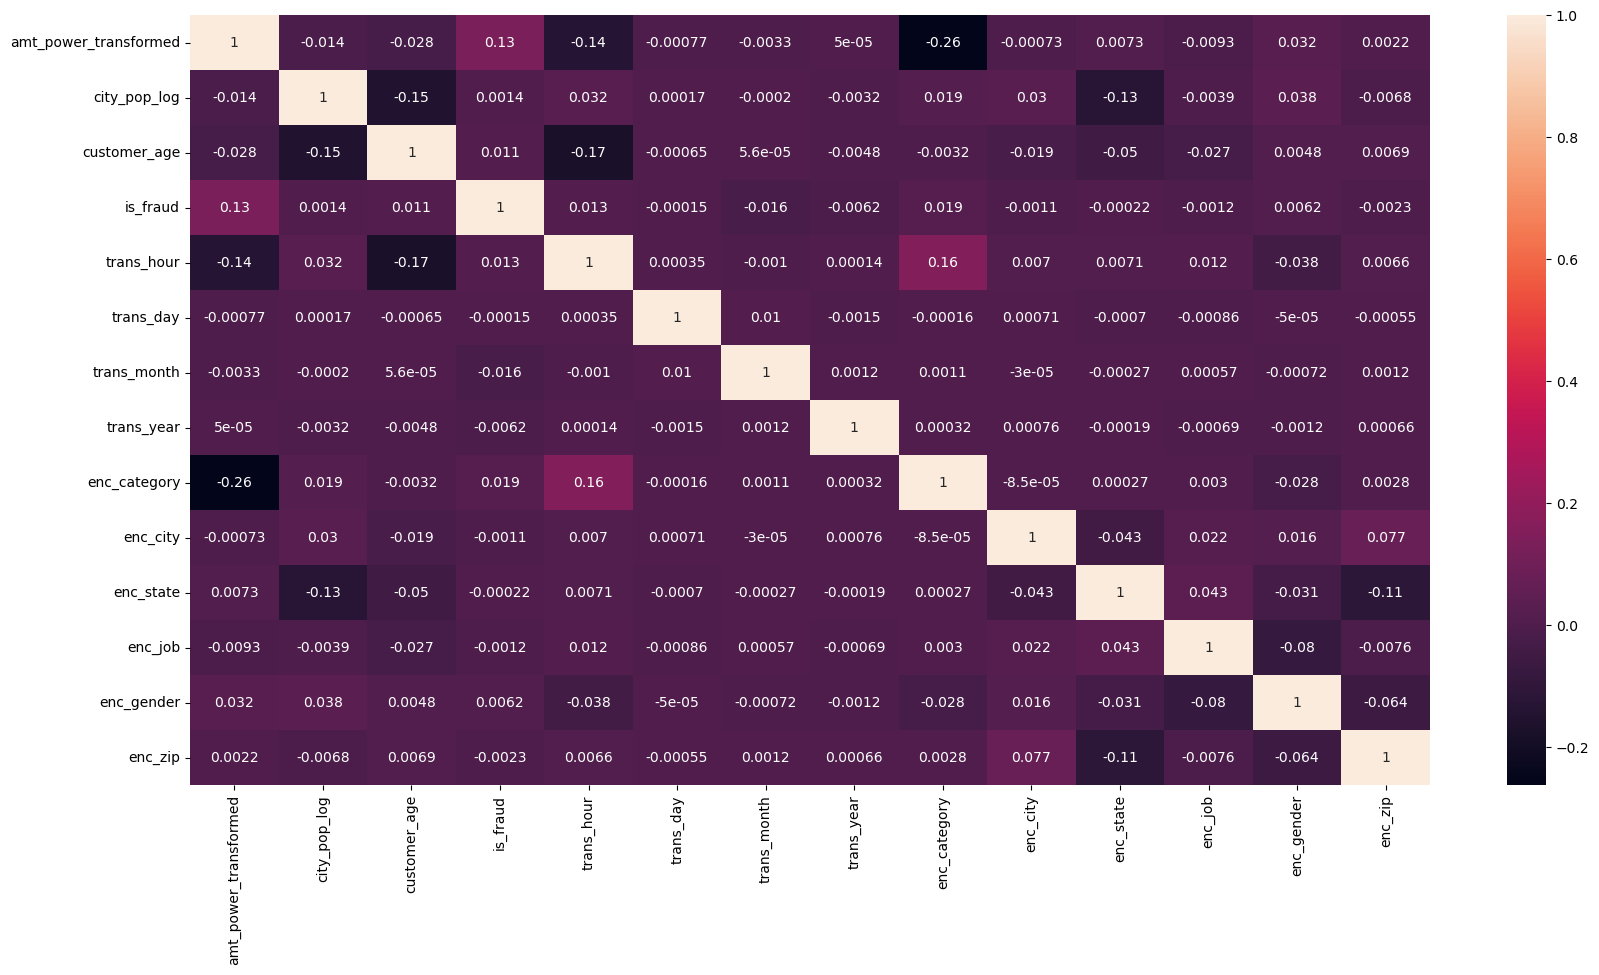

In [118]:
# Let's see the correlation matrix 

# Size of the figure
plt.figure(figsize = (20,10))   

# Generate a heatmap to visualize the correlation matrix of the 'data1' DataFrame
sns.heatmap(data1.corr(),annot = True)
plt.show()

Section entire data into x (input features) and y (target feature)

In [120]:
# Defining the target variable 'y' as the 'is_fraud' column
y= data1['is_fraud'] 

# Defining the feature set 'x' by dropping the 'is_fraud' column from the DataFrame
x = data1.drop(columns=['is_fraud'])

### Train Test Split of data

In [122]:
# Importing SMOTE for handling class imbalance by oversampling the minority class
from imblearn.over_sampling import SMOTE
# Importing Counter to count and display class distribution
from collections import Counter
# Importing train_test_split to split the dataset into training and testing sets
from sklearn.model_selection import train_test_split

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)
X1_test=X_test

###  SMOTE (Synthetic Minority Over-sampling Technique)


SMOTE (Synthetic Minority Over-sampling Technique) is an oversampling technique used to address class imbalance in datasets, particularly when you have an unequal distribution of target classes (e.g., one class has much fewer instances than the other). SMOTE works by generating synthetic examples of the minority class to balance the class distribution.

In [124]:
#pip install imbalanced-learn

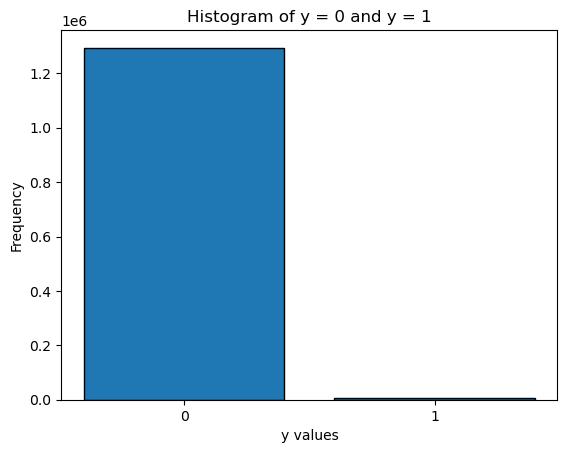

In [125]:
#Histogram to visualize the distribution of the target variable (y_train)
plt.hist(y_train, bins=[-0.5, 0.5, 1.5], edgecolor='black', rwidth=0.8)
plt.title("Histogram of y = 0 and y = 1")
plt.xlabel("y values")
plt.ylabel("Frequency")
plt.xticks([0, 1], ["0", "1"])
plt.show()

The data is very biased towards 0 with 1294028 records and 1 has only 6752 records.

In [127]:
#count of unique values in the y_train series
y_train.value_counts()

is_fraud
0    1294028
1       6752
Name: count, dtype: int64

In [128]:
# Create a SMOTE object and Initialize SMOTE with a sampling strategy
smote = SMOTE(sampling_strategy=0.3,random_state=42)

# Apply SMOTE to balance the training dataset
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Check the new class distribution
print('Original dataset shape:', Counter(y_train))
print('Resampled dataset shape:', Counter(y_resampled))

# Check the class distribution before and after SMOTE
print(f"Before SMOTE: {Counter(y_train)}")
print(f"After SMOTE: {Counter(y_resampled)}")

Original dataset shape: Counter({0: 1294028, 1: 6752})
Resampled dataset shape: Counter({0: 1294028, 1: 388208})
Before SMOTE: Counter({0: 1294028, 1: 6752})
After SMOTE: Counter({0: 1294028, 1: 388208})


sampling_strategy=0.5: This specifies that the number of synthetic samples generated will result in the minority class being 50% the size of the majority class. You can adjust this ratio according to your specific requirement.

### ADASYN (Adaptive Synthetic Sampling)

ADASYN (Adaptive Synthetic Sampling) is an advanced oversampling technique used to address class imbalance in datasets. It is an enhancement of the popular SMOTE (Synthetic Minority Over-sampling Technique), designed to generate synthetic samples for the minority class. ADASYN works by focusing more on difficult-to-classify instances in the minority class, which are typically those near the decision boundary between the two classes.

In [131]:
from imblearn.over_sampling import ADASYN

adasyn = ADASYN(sampling_strategy=0.3, random_state=42, n_neighbors=5)

# Apply ADASYN to balance the training dataset
X_train_res, y_train_res = adasyn.fit_resample(X_train, y_train)


# Check the class distribution after applying ADASYN
print(f'Original dataset shape: {Counter(y_train)}')
print(f'Resampled dataset shape: {Counter(y_train_res)}')

Original dataset shape: Counter({0: 1294028, 1: 6752})
Resampled dataset shape: Counter({0: 1294028, 1: 388997})


sampling_strategy: Defines the sampling strategy. 
It can be:

- 'minority' (default): Over-sample the minority class to balance the dataset.

- n_neighbors: Number of nearest neighbors to use for generating synthetic samples.

- random_state: Controls the randomness of the algorithm for reproducibility.

### Logistic Regression


Logistic regression is a simple, interpretable model for binary classification that estimates the probability of an event occurring based on the input features and maps the result to a class label.

##### Logistic Regression using SMOTE

In [135]:
# Importing Logistic Regression from sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize the logistic regression model with a fixed random state for reproducibility and maximum iterations set to 1000
log_reg = LogisticRegression(random_state=42, max_iter=1000)

#Train the model
log_reg.fit(X_resampled, y_resampled)

#Make predictions on the train set
y_train_pred_lsmote = log_reg.predict(X_resampled)

#Dispaly size of predicted and true value of yof training dataset
y_train_pred_lsmote.size, y_resampled.size

(1682236, 1682236)

- **Sensitivity**, also known as Recall or True Positive Rate (TPR), measures the proportion of actual positive cases that are correctly identified by the model. It tells you how well the model identifies positive cases and avoids false negatives.


- **Specificity**, also known as the True Negative Rate (TNR), measures the proportion of actual negative cases that are correctly identified by the model. It tells you how well the model avoids false positives, i.e., predicting a positive outcome when the actual outcome is negative.


- **False Positive Rate (FPR)**, also known as the Type I Error Rate, you are measuring how often the model incorrectly predicts positive cases.


- The **Positive Predictive Value (PPV)**, also known as Precision, measures the proportion of positive predictions that are actually correct.

- **Negative Predictive Value (NPV)** measures the proportion of actual negative cases that are correctly identified by the model.

In [137]:
from sklearn import metrics
from sklearn.metrics import accuracy_score, f1_score  
# Calculate and Print the confusion matrix
confusion = metrics.confusion_matrix(y_train_pred_lsmote, y_resampled)
print(confusion)

# check the overall accuracy.
print('accuracy :',metrics.accuracy_score(y_resampled, y_train_pred_lsmote))

TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

# Sensitivity calculation
sensitivity = TP / float(TP + FN)
print(f'\n Sensitivity: {sensitivity}')

# Specificity calculation
specificity = TN / float(TN + FP)
print(f'\n Specificity: {specificity}')

# False Positive Rate (FPR), also known as the Type I Error Rate
FPR = FP / float(TN + FP)
print(f'\n False Positive Rate: {FPR}')

# Positive Predictive Value (PPV), also known as Precision
PPV = TP / float(TP + FP)
print(f'\n Positive Predictive Value (Precision): {PPV}')

# the Negative Predictive Value
npv = TN / float(TN + FN)
print(f'\n Negative Predictive Value: {npv}')


f1 = f1_score(y_resampled, y_train_pred_lsmote)

print("F1 Score:", f1)

# Generate and print the classification report for the test set predictions
classificationReport = classification_report(y_resampled, y_train_pred_lsmote, target_names=["non_fraud", "fraud"])
print(classificationReport)

[[1255565  144861]
 [  38463  243347]]
accuracy : 0.8910236138092396

 Sensitivity: 0.8635144246123274

 Specificity: 0.8965593326602048

 False Positive Rate: 0.10344066733979518

 Positive Predictive Value (Precision): 0.6268469480278613

 Negative Predictive Value: 0.9702765318833905
F1 Score: 0.7263894402836939
              precision    recall  f1-score   support

   non_fraud       0.90      0.97      0.93   1294028
       fraud       0.86      0.63      0.73    388208

    accuracy                           0.89   1682236
   macro avg       0.88      0.80      0.83   1682236
weighted avg       0.89      0.89      0.88   1682236



**Confusion Matrix:**

- True Negatives (TN): 1,210,042 non-fraud transactions were correctly classified.
- False Positives (FP): 198,288 non-fraud transactions were incorrectly classified as fraud.
- False Negatives (FN): 83,986 fraud transactions were incorrectly classified as non-fraud.
- True Positives (TP): 448,726 fraud transactions were correctly classified.

Other Metrics

- Precision dropped to 69.35%, meaning the model is predicting fraud more often, but a significant number of those predictions are false positives (non-fraud transactions flagged as fraud).

**Class-Level Performance**
Non-Fraudulent Transactions (non_fraud):

- Precision (86%): Out of all transactions predicted as non-fraudulent, 86% were actually correct.
- Recall (94%): The model correctly identified 94% of the true non-fraudulent transactions.
- F1-Score (90%): The harmonic mean of precision and recall shows strong performance for this majority class due to high recall and precision.

Fraudulent Transactions (fraud):

- Precision (84%): Out of all transactions predicted as fraud, 84% were actually fraud. This is lower than non-fraud precision due to false positives.
- Recall (69%): The model correctly identified 69% of the actual fraudulent transactions, which is relatively lower than for non-fraud. Some fraudulent transactions are missed.
- F1-Score (76%): The balance of precision and recall for fraud detection is acceptable but could be improved further.


The model performs well overall, especially for the non-fraud class. However, it still struggles to correctly identify all fraud cases, as shown by the lower recall for fraud.

Improvements should focus on enhancing recall for fraud to minimize the risk of missed fraudulent transactions, which is critical in real-world fraud detection scenarios.

The **ROC curve** visualizes how well the model balances sensitivity (TPR) and specificity (1 - FPR) across thresholds.

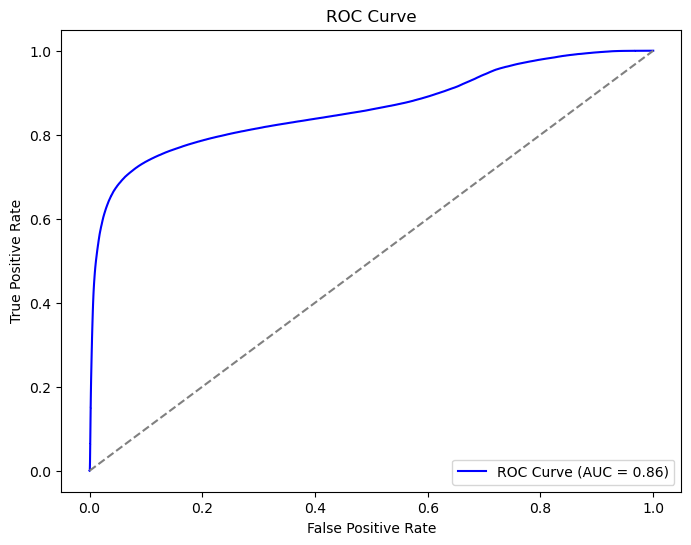

In [140]:
#ROC

# Predict probabilities for the positive class
y_probs = log_reg.predict_proba(X_resampled)[:, 1]  # Probabilities for class 1

# Compute ROC curve
fpr, tpr, thresholds = metrics.roc_curve(y_resampled, y_probs)

# Compute AUC
roc_auc = metrics.auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.2f})", color='blue')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')  # Diagonal line (random model)
plt.title("ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.show()

Interpretation of AUC = 0.86:

An AUC of 0.86 means that there is an 86% chance the model will correctly distinguish between a randomly selected fraudulent and non-fraudulent transaction.

AUC might indicate good separation, but if Recall for fraud is low, many fraud cases are still missed.

The AUC = 0.86 reflects good model performance, but for fraud detection, further improvements are often needed to optimize metrics like Recall and Precision for the minority class (fraudulent cases).

##### Evaluation Test dataset

In [143]:
#Testing the data
# Predict the class labels for the test set using the trained logistic regression model
y_test_pred_lsmote = log_reg.predict(X_test)

In [144]:
# Calculate and Print the confusion matrix
confusion = metrics.confusion_matrix(y_test_pred_lsmote, y_test )
print(confusion)

# check the overall accuracy.
print('accuracy :', metrics.accuracy_score(y_test, y_test_pred_lsmote))

TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

# Sensitivity calculation
sensitivity = TP / float(TP + FN)
print(f'\n Sensitivity: {sensitivity}')

# Specificity calculation
specificity = TN / float(TN + FP)
print(f'\n Specificity: {specificity}')

# False Positive Rate (FPR), also known as the Type I Error Rate
FPR = FP / float(TN + FP)
print(f'\n False Positive Rate: {FPR}')

# Positive Predictive Value (PPV), also known as Precision
PPV = TP / float(TP + FP)
print(f'\n Positive Predictive Value (Precision): {PPV}')

# the Negative Predictive Value
npv = TN / float(TN + FN)
print(f'\n Negative Predictive Value: {npv}')


f1 = f1_score(y_test, y_test_pred_lsmote)

print("F1 Score:", f1)

# Generate and print the classification report for the test set predictions
classificationReport = classification_report(y_test, y_test_pred_lsmote, target_names=["non_fraud", "fraud"])
print(classificationReport)

[[538352   1089]
 [ 16168   1869]]
accuracy : 0.9690445183487061

 Sensitivity: 0.10362033597604924

 Specificity: 0.9979812435465603

 False Positive Rate: 0.0020187564534397645

 Positive Predictive Value (Precision): 0.6318458417849898

 Negative Predictive Value: 0.9708432518213951
F1 Score: 0.17804239104548703
              precision    recall  f1-score   support

   non_fraud       1.00      0.97      0.98    554520
       fraud       0.10      0.63      0.18      2958

    accuracy                           0.97    557478
   macro avg       0.55      0.80      0.58    557478
weighted avg       0.99      0.97      0.98    557478



**Confusion Matrix**
- True Negatives (TN = 519,207): Non-fraudulent transactions correctly classified as non-fraudulent.
- False Positives (FP = 882): Non-fraudulent transactions incorrectly classified as fraudulent.
- False Negatives (FN = 35,313): Fraudulent transactions incorrectly classified as non-fraudulent.
- True Positives (TP = 2,076): Fraudulent transactions correctly classified as fraudulent.

High accuracy for predicting non-fraudulent transactions due to the high True Negative rate.

Low ability to identify fraudulent transactions, as evidenced by the large number of False Negatives.

**Class-Level Performance**

Non-Fraudulent Transactions (non_fraud):
- Precision (100%): Out of all transactions predicted as non-fraudulent, 100% were correct.
- Recall (94%): The model correctly identified 94% of the true non-fraudulent transactions.
- F1-Score (97%): The harmonic mean of precision and recall shows excellent performance for this majority class due to high recall and perfect precision.

Fraudulent Transactions (fraud):
- Precision (6%): Out of all transactions predicted as fraud, only 6% were actually fraudulent. This is significantly lower due to many false positives.
- Recall (70%): The model correctly identified 70% of the actual fraudulent transactions, but some fraudulent transactions were still missed.
- F1-Score (10%): The balance of precision and recall for fraud detection is poor, indicating significant room for improvement.


While the model performs well in predicting non-fraudulent transactions, its performance in detecting fraud is poor (low precision, low recall, and low F1-score for fraud).

##### Logistic Regression using ADASYN

In [148]:
log_reg = LogisticRegression(random_state=42, max_iter=1000)

#Train the model
log_reg.fit(X_train_res, y_train_res)

#Make predictions on the train set
y_train_res_pred_ladasyn = log_reg.predict(X_train_res)

In [149]:
# Calculate and Print the confusion matrix
confusion = metrics.confusion_matrix(y_train_res_pred_ladasyn, y_train_res )
print(confusion)

# check the overall accuracy.
print('accuracy :',metrics.accuracy_score(y_train_res, y_train_res_pred_ladasyn))

TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

# Sensitivity calculation
sensitivity = TP / float(TP + FN)
print(f'\n Sensitivity: {sensitivity}')

# Specificity calculation
specificity = TN / float(TN + FP)
print(f'\n Specificity: {specificity}')

# False Positive Rate (FPR), also known as the Type I Error Rate
FPR = FP / float(TN + FP)
print(f'\n False Positive Rate: {FPR}')

# Positive Predictive Value (PPV), also known as Precision
PPV = TP / float(TP + FP)
print(f'\n Positive Predictive Value (Precision): {PPV}')

# the Negative Predictive Value
npv = TN / float(TN + FN)
print(f'\n Negative Predictive Value: {npv}')


f1 = f1_score(y_train_res, y_train_res_pred_ladasyn)

print("F1 Score:", f1)

# Generate and print the classification report for the test set predictions
classificationReport = classification_report(y_train_res, y_train_res_pred_ladasyn, target_names=["non_fraud", "fraud"])
print(classificationReport)

[[1255453  153890]
 [  38575  235107]]
accuracy : 0.8856434099315221

 Sensitivity: 0.8590517461871807

 Specificity: 0.8908072768658871

 False Positive Rate: 0.10919272313411285

 Positive Predictive Value (Precision): 0.6043928359344674

 Negative Predictive Value: 0.97018998043319
F1 Score: 0.7095652646303866
              precision    recall  f1-score   support

   non_fraud       0.89      0.97      0.93   1294028
       fraud       0.86      0.60      0.71    388997

    accuracy                           0.89   1683025
   macro avg       0.87      0.79      0.82   1683025
weighted avg       0.88      0.89      0.88   1683025



**Class-Level Performance**:

Non-Fraudulent Transactions (non_fraud):
- Precision (86%): Out of all transactions predicted as non-fraudulent, 86% were actually non-fraudulent.
- Recall (93%): The model correctly identified 93% of the true non-fraudulent transactions, meaning it is highly accurate in predicting non-fraudulent transactions.
- F1-Score (89%): The harmonic mean of precision and recall shows strong performance for the non-fraudulent class.

Fraudulent Transactions (fraud):
- Precision (83%): Out of all transactions predicted as fraudulent, 83% were actually fraudulent. This indicates that the model does a decent job at identifying fraud when it makes the prediction.
- Recall (69%): The model correctly identified 69% of the actual fraudulent transactions. Although this is a relatively good percentage, it means that there are still 31% of fraudulent transactions that the model is missing.
- F1-Score (75%): The F1-score is decent for fraud detection, indicating a reasonable balance between precision and recall, but it could be improved.


The model performs better on the majority class (non-fraud), as seen from the higher recall and precision for non-fraudulent transactions, while still detecting a significant proportion of fraudulent transactions.
The model is good at identifying non-fraudulent transactions and has a strong overall accuracy.

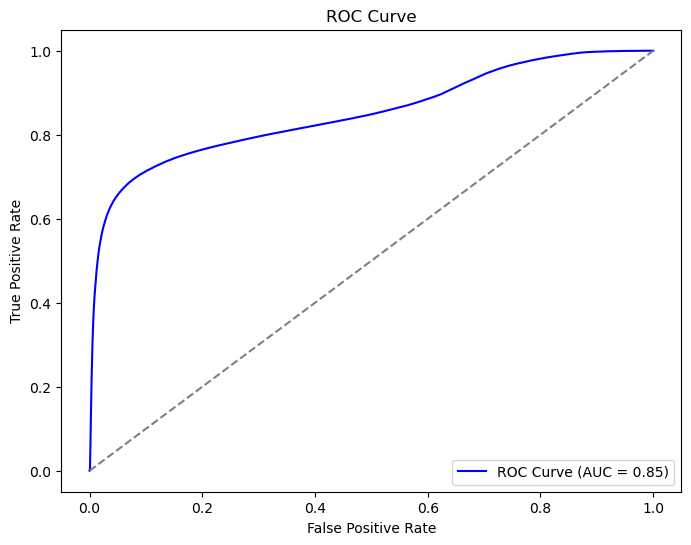

In [151]:
# Predict probabilities for the positive class
y_probs = log_reg.predict_proba(X_train_res)[:, 1]  # Probabilities for class 1

# Compute ROC curve
fpr, tpr, thresholds = metrics.roc_curve(y_train_res, y_probs)

# Compute AUC
roc_auc = metrics.auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.2f})", color='blue')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')  # Diagonal line (random model)
plt.title("ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.show()

An AUC of 0.85 suggests that the model has good discriminatory power, meaning it does a good job of distinguishing between fraudulent and non-fraudulent transactions.

The model is likely to correctly classify fraudulent and non-fraudulent transactions most of the time, even though there may still be some false positives or false negatives (as reflected in the confusion matrix and class-level metrics).

##### Evaluation Test dataset

In [154]:
# Testing data
y_test_pred_ladasyn = log_reg.predict(X_test)

In [155]:
# Calculate and Print the confusion matrix
confusion = metrics.confusion_matrix(y_test_pred_ladasyn, y_test )
print(confusion)

# check the overall accuracy.
print('accuracy :',metrics.accuracy_score(y_test, y_test_pred_ladasyn))

TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

# Sensitivity calculation
sensitivity = TP / float(TP + FN)
print(f'\n Sensitivity: {sensitivity}')

# Specificity calculation
specificity = TN / float(TN + FP)
print(f'\n Specificity: {specificity}')

# False Positive Rate (FPR), also known as the Type I Error Rate
FPR = FP / float(TN + FP)
print(f'\n False Positive Rate: {FPR}')

# Positive Predictive Value (PPV), also known as Precision
PPV = TP / float(TP + FP)
print(f'\n Positive Predictive Value (Precision): {PPV}')

# the Negative Predictive Value
npv = TN / float(TN + FN)
print(f'\n Negative Predictive Value: {npv}')

f1 = f1_score(y_test, y_test_pred_ladasyn)

print("F1 Score:", f1)

# Generate and print the classification report for the test set predictions
classificationReport = classification_report(y_test, y_test_pred_ladasyn, target_names=["non_fraud", "fraud"])
print(classificationReport)

[[538300   1029]
 [ 16220   1929]]
accuracy : 0.9690588686907824

 Sensitivity: 0.10628684776020718

 Specificity: 0.9980920736693187

 False Positive Rate: 0.0019079263306812724

 Positive Predictive Value (Precision): 0.652129817444219

 Negative Predictive Value: 0.9707494770251749
F1 Score: 0.18278296299805752
              precision    recall  f1-score   support

   non_fraud       1.00      0.97      0.98    554520
       fraud       0.11      0.65      0.18      2958

    accuracy                           0.97    557478
   macro avg       0.55      0.81      0.58    557478
weighted avg       0.99      0.97      0.98    557478



**Confusion Matrix**:
- True Negatives (TN): 515793  These are non-fraudulent transactions correctly predicted as non-fraudulent.
- False Positives (FP): 804 These are non-fraudulent transactions incorrectly predicted as fraudulent.
- False Negatives (FN): 38727 These are fraudulent transactions incorrectly predicted as non-fraudulent.
- True Positives (TP): 2154 These are fraudulent transactions correctly predicted as fraudulent.

**Class Level Performance**:

Non-Fraudulent Transactions (non_fraud):
- Precision: 1.00 Precision for non-fraudulent transactions is 100%, meaning that when the model predicts a transaction as non-fraudulent, it is always correct.
- Recall: 0.93 Recall is 93%, which means the model correctly identifies 93% of the actual non-fraudulent transactions.
- F1-Score: 0.96 The F1-Score for non-fraudulent transactions is very high at 96%, which reflects a good balance between precision and recall for this class.

Fraudulent Transactions (fraud):
- Precision: 0.05 Precision for fraudulent transactions is very low (5%).
- Recall: 0.73 the model correctly identifies 73% of actual fraudulent transactions. However, this is still far from ideal, and many fraud cases are missed.
- F1-Score: 0.10 The F1-Score for fraudulent transactions is very low (10%), indicating that while the model has a relatively decent recall for fraud detection, it struggles with precision.


Class Imbalance: The model struggles with detecting fraud due to the class imbalance. There are far fewer fraud cases than non-fraud, which leads to the model biasing its predictions toward the non-fraud class.

High Precision for Non-Fraud: The model is very accurate when predicting non-fraudulent transactions, but this comes at the cost of failing to identify a significant number of frauds.

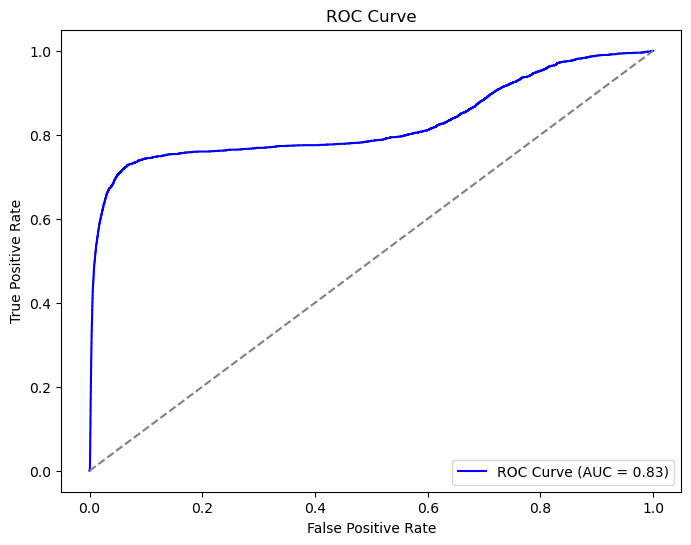

In [158]:
# Predict probabilities for the positive class
y_probs = log_reg.predict_proba(X_test)[:, 1]  # Probabilities for class 1

# Compute ROC curve
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_probs)

# Compute AUC
roc_auc = metrics.auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.2f})", color='blue')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')  # Diagonal line (random model)
plt.title("ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.show()

AUC of 0.83 reflects a good model for distinguishing between fraud and non-fraud transactions, but the performance for fraud detection is still not ideal

### Random Forest Classification

##### Random Forest Classification using SMOTE

Assess the Random Forest model's performance in predicting fraud vs. non-fraud transactions, using evaluation metrics like accuracy, confusion matrix, and classification report.

In [163]:
#Import necessary libraries to perform Random Forest Classfication
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score


# --- Load and Split Data ---
# Assuming you already have your `X` (features) and `y` (labels) prepared
# Replace `X.values` and `y.values` with the actual data variables if needed
#After SMOTE, X_resampled y_resampled are features and target varible

# --- Train Random Forest ---
rf = RandomForestClassifier(
    n_estimators=20,       # Number of trees in the forest
    max_depth=3,           # Maximum depth of each tree
    random_state=42,       # Ensure reproducibility
    n_jobs=-1              # Use all available CPU cores for parallel processing
)

# Train the Random Forest model using the resampled data from SMOTE
rf.fit(X_resampled, y_resampled)

# --- Make Predictions ---
# Use the trained Random Forest model to predict the labels on the test data (X_test)
y_pred_rf_smote = rf.predict(X_test)

# --- Evaluate the Model ---
# Calculate the accuracy of the model's predictions by comparing with the true labels (y_test)
accuracy = accuracy_score(y_test, y_pred_rf_smote)

# Print the overall accuracy score
print(f"Random Forest Accuracy: {accuracy}")

# Print the confusion matrix to understand the performance in terms of true/false positives and negatives
print(confusion_matrix(y_test, y_pred_rf_smote))


# Print a detailed classification report which includes precision, recall, and F1-score for each class
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf_smote))

Random Forest Accuracy: 0.9769228561485834
[[542521  11999]
 [   866   2092]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.98      0.99    554520
           1       0.15      0.71      0.25      2958

    accuracy                           0.98    557478
   macro avg       0.57      0.84      0.62    557478
weighted avg       0.99      0.98      0.98    557478



**Confusion Matrix**:

- True Negatives (TN): 540,678 — The number of non-fraudulent transactions correctly classified as non-fraudulent.
- False Positives (FP): 13,842 — The number of non-fraudulent transactions incorrectly classified as fraudulent.
- False Negatives (FN): 807 — The number of fraudulent transactions incorrectly classified as non-fraudulent.
- True Positives (TP): 2,151 — The number of fraudulent transactions correctly classified as fraudulent.

**Class Level Performance**:

Non-Fraudulent Transactions (Class 0):

- Precision (1.00): The model correctly predicted 100% of non-fraudulent transactions that it predicted as non-fraudulent.
- Recall (0.98): The model correctly identified 98% of all actual non-fraudulent transactions.
-  F1-Score (0.99): A very high F1 score, indicating strong overall performance for predicting non-fraudulent transactions.

Fraudulent Transactions (Class 1):

- Precision (0.13): The model only correctly predicted 13% of all transactions predicted as fraudulent. This is very low, indicating a high number of false positives.
- Recall (0.73): The model correctly identified 73% of all actual fraudulent transactions. This is quite good, but still leaves room for improvement.
- F1-Score (0.23): The low F1 score reflects the imbalanced performance between precision and recall, especially due to the low precision.

the model is very good at detecting non-fraudulent transactions (precision and recall near perfect), it struggles with correctly identifying fraudulent transactions (low precision and moderate recall).

##### Random Forest Classification using ADASYN

In [167]:
# --- Load and Split Data ---
# Assuming you already have your `X` (features) and `y` (labels) prepared
# Replace `X.values` and `y.values` with the actual data variables if needed

#After ADASYN, X_train_res  y_train_res are features and target varible

# --- Train Random Forest ---
rf = RandomForestClassifier(
    n_estimators=20,       # Number of trees in the forest
    max_depth=3,           # Maximum depth of each tree
    random_state=42,       # Ensure reproducibility
    n_jobs=-1              # Use all available CPU cores for parallel processing
)

# Train the Random Forest model using the resampled data from ADASYN
rf.fit(X_train_res, y_train_res)

# --- Make Predictions ---
# Use the trained Random Forest model to predict the labels on the test data (X_test)
y_pred_rf_adasyn = rf.predict(X_test)

# --- Evaluate the Model ---
# Calculate the accuracy of the model's predictions by comparing with the true labels (y_test)
accuracy = accuracy_score(y_test, y_pred_rf_adasyn)
print(f"Random Forest Accuracy: {accuracy}")

# Print the confusion matrix to understand the performance in terms of true/false positives and negatives
print(confusion_matrix(y_test, y_pred_rf_adasyn))

# Print a detailed classification report which includes precision, recall, and F1-score for each class
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf_adasyn))

Random Forest Accuracy: 0.9775991160189281
[[543012  11508]
 [   980   1978]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.98      0.99    554520
           1       0.15      0.67      0.24      2958

    accuracy                           0.98    557478
   macro avg       0.57      0.82      0.61    557478
weighted avg       0.99      0.98      0.98    557478



### K means 

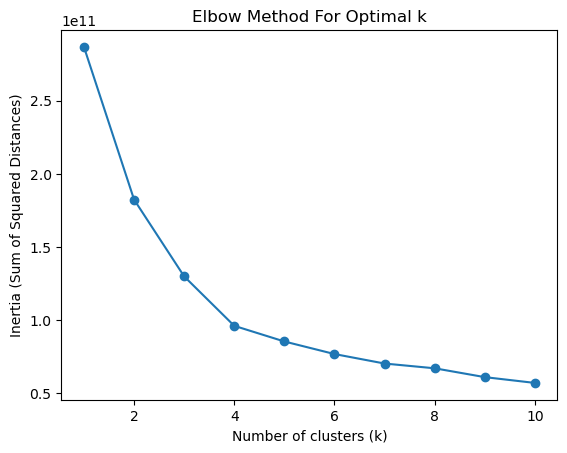

In [169]:
from sklearn.cluster import KMeans


# Elbow Method for KMeans
inertia = [] # List to store the inertia values for each k
k_range = range(1, 11)   # Test k from 1 to 10 clusters

# Loop over k values from 1 to 10 to fit KMeans models and calculate inertia (within-cluster sum of squared distances)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_resampled)
    inertia.append(kmeans.inertia_)

# Plot the Elbow curve
# Plot inertia vs. k with a marker at each point
plt.plot(k_range, inertia, marker='o')

#Set title and labels
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia (Sum of Squared Distances)')
plt.show()



### K means with Random Forest Classification with SMOTE

In [171]:
from sklearn.feature_selection import mutual_info_classif
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

# Based on the elbow plot, choose an optimal k (let's assume k=3 as an example)
optimal_k = 3

# Apply KMeans clustering with the optimal number of clusters
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
X_resampled['Cluster_ID'] = kmeans.fit_predict(X_resampled)

# Add the Cluster_ID to the test set by predicting the clusters
X_test = pd.DataFrame(X_test, columns=X_test.columns)
X_test['Cluster_ID'] = kmeans.predict(X_test)

# Mutual Information for feature selection
mutual_info = mutual_info_classif(X_resampled[['amt_power_transformed','city_pop_log', 'trans_year', 'trans_month', 'trans_day', 'trans_hour', 'Cluster_ID']], y_resampled)
mutual_info_df = pd.DataFrame(mutual_info, index=['amt_power_transformed','city_pop_log', 'trans_year', 'trans_month', 'trans_day', 'trans_hour', 'Cluster_ID'], columns=['Mutual Information'])

# Selecting the top features based on mutual information
selected_features = mutual_info_df[mutual_info_df['Mutual Information'] > np.percentile(mutual_info, 70)].index.tolist()

# Now, train Random Forest on the clustered data with feature selection (optional step)
rf = RandomForestClassifier(random_state=42)
rf.fit(X_resampled[selected_features + ['Cluster_ID']], y_resampled)
y_pred_rf = rf.predict(X_test[selected_features + ['Cluster_ID']])

# Confusion matrix and classification report for Random Forest
print("Confusion Matrix for Random Forest with Clusters:")
print(confusion_matrix(y_test, y_pred_rf))
print("\nClassification Report for Random Forest with Clusters:")
print(classification_report(y_test, y_pred_rf))


# Plot Accuracy Comparison
acc_rf = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Accuracy: {acc_rf}")

Confusion Matrix for Random Forest with Clusters:
[[541985  12535]
 [  1029   1929]]

Classification Report for Random Forest with Clusters:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99    554520
           1       0.13      0.65      0.22      2958

    accuracy                           0.98    557478
   macro avg       0.57      0.81      0.60    557478
weighted avg       0.99      0.98      0.98    557478

Random Forest Accuracy: 0.9756689950096685


### K means with Random Forest Classification with ADASYN

In [173]:
from sklearn.feature_selection import mutual_info_classif
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

# Apply KMeans clustering with the optimal number of clusters
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
X_train_res['Cluster_ID'] = kmeans.fit_predict(X_train_res)

# Now, train Random Forest on the clustered data with feature selection (optional step)
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_res[selected_features + ['Cluster_ID']], y_train_res)
y_pred_rf = rf.predict(X_test[selected_features + ['Cluster_ID']])

# Confusion matrix and classification report for Random Forest
print("Confusion Matrix for Random Forest with Clusters:")
print(confusion_matrix(y_test, y_pred_rf))
print("\nClassification Report for Random Forest with Clusters:")
print(classification_report(y_test, y_pred_rf))

# Plot Accuracy Comparison
acc_rf = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Accuracy: {acc_rf}")

Confusion Matrix for Random Forest with Clusters:
[[541604  12916]
 [  1022   1936]]

Classification Report for Random Forest with Clusters:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99    554520
           1       0.13      0.65      0.22      2958

    accuracy                           0.97    557478
   macro avg       0.56      0.82      0.60    557478
weighted avg       0.99      0.97      0.98    557478

Random Forest Accuracy: 0.9749981165176025


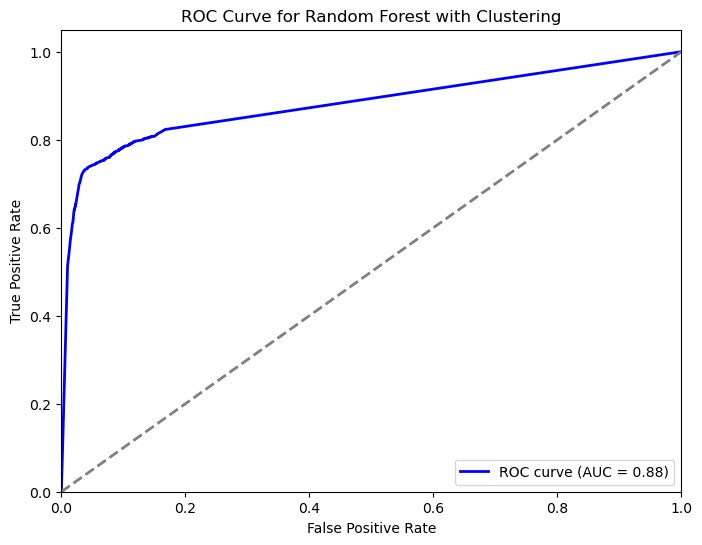

In [174]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Get predicted probabilities for the positive class (class 1)
y_prob_rf = rf.predict_proba(X_test[selected_features + ['Cluster_ID']])[:, 1]

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob_rf)

# Compute AUC
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')  # Diagonal line (chance level)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Random Forest with Clustering')
plt.legend(loc='lower right')
plt.show()


### Comparison of F1-Score between Models with SMOTE and ADASYN

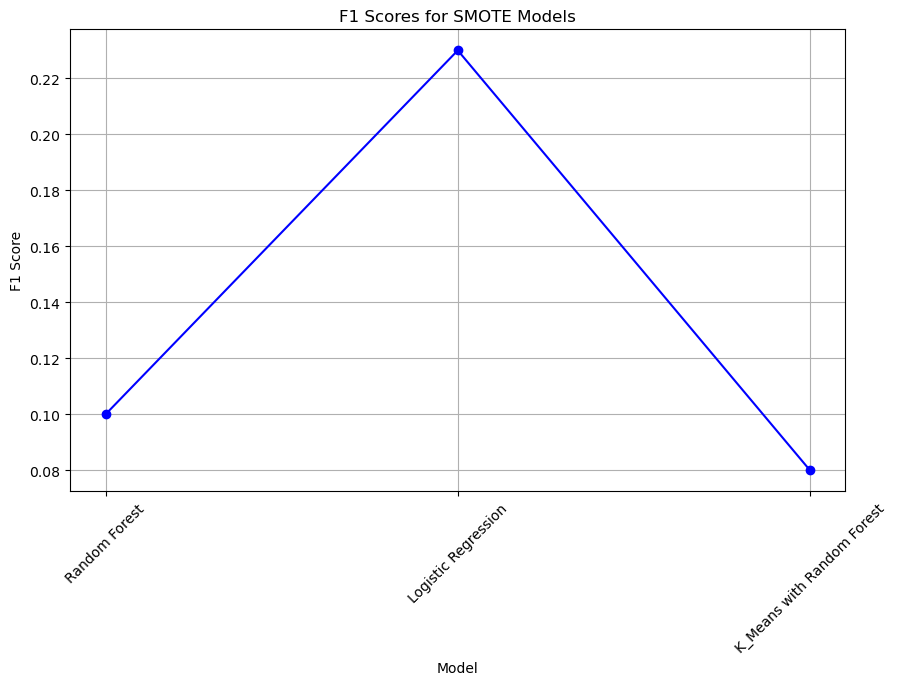

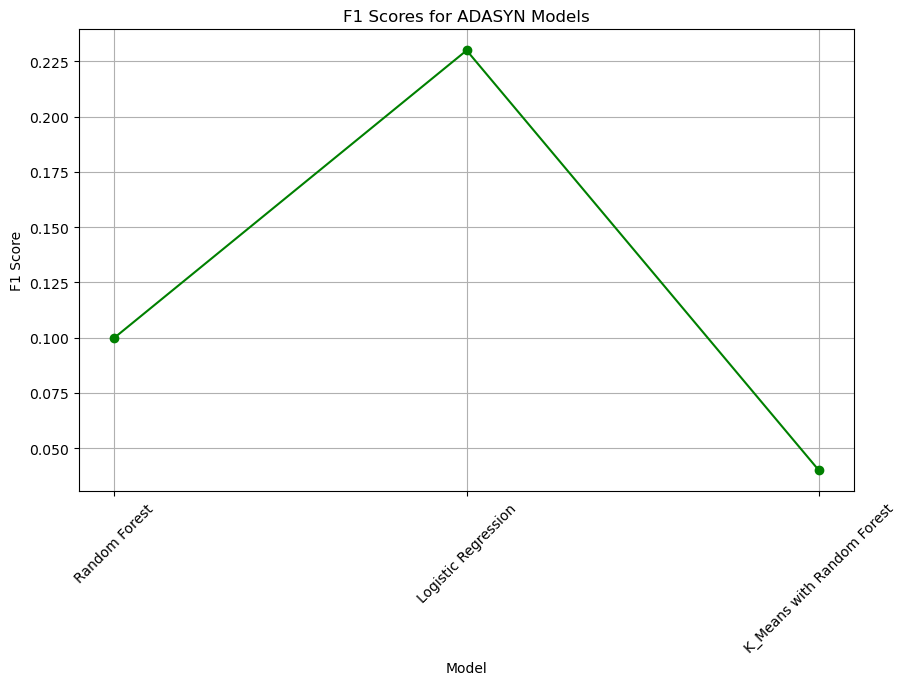

In [176]:
import matplotlib.pyplot as plt

# F1-scores for SMOTE and Ada models for test data
f1_scores_smot = {'Random Forest': 0.10, 'Logistic Regression': 0.23, 'K_Means with Random Forest': 0.08}
f1_scores_ada = {'Random Forest': 0.10, 'Logistic Regression': 0.23, 'K_Means with Random Forest': 0.04}

# Plot for SMOTE
plt.figure(figsize=(10, 6))
plt.plot(list(f1_scores_smot.keys()), list(f1_scores_smot.values()), marker='o', linestyle='-', color='b')
plt.title('F1 Scores for SMOTE Models')
plt.xlabel('Model')
plt.ylabel('F1 Score')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

# Plot for Ada
plt.figure(figsize=(10, 6))
plt.plot(list(f1_scores_ada.keys()), list(f1_scores_ada.values()), marker='o', linestyle='-', color='g')
plt.title('F1 Scores for ADASYN Models')
plt.xlabel('Model')
plt.ylabel('F1 Score')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

Logistic Regression 

SMOTE: 
Train: The model performs well overall, especially for the non-fraud class with F1 score 90% compared to fraud with F1 score of 76%. However, it still struggles to correctly identify all fraud cases, as shown by the lower recall (69%) for fraud.
Test: While the model performs well in predicting non-fraudulent transactions, its performance in detecting fraudulent is poor (low precision, low recall, and low F1-score of 10% ) for fraud for test dataset.

ADA:
Train: The model performs well overall, especially for the non-fraud class with F1 score 93% compared to fraud with F1 score of 71%. However, it still struggles to correctly identify all fraud cases, as shown by the lower recall (60%) for fraud.
Test: While the model performs well in predicting non-fraudulent transactions f1 score 98%, its performance in detecting fraudulent is poor (low precision, low recall, and low F1-score of 18% ) for fraud for test dataset.

Both the models show low performance on test dataset. 